# Dnajb14

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums, mannwhitneyu

In [2]:
gene = 'Dnajb14'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30522882,C57BL/6N,f,mutant,het (Dnajb14),19.5,69.23,37.78,3.14,2.03
1,30522883,C57BL/6N,m,mutant,het (Dnajb14),27.9,85.80,53.53,2.76,1.30
2,30522884,C57BL/6N,m,mutant,het (Dnajb14),29.9,79.55,47.63,3.67,1.97
3,30522885,C57BL/6N,m,control,wt (Dnajb14),29.7,55.10,28.19,3.83,2.85
4,30522889,C57BL/6N,f,mutant,het (Dnajb14),20.8,82.93,50.13,2.82,1.48
5,30522890,C57BL/6N,f,control,wt (Dnajb14),21.7,76.31,43.46,2.86,1.62
6,30522896,C57BL/6N,f,mutant,het (Dnajb14),21.5,78.66,45.80,3.06,1.66
7,30522898,C57BL/6N,m,mutant,het (Dnajb14),28.2,92.33,62.75,2.36,0.93
8,30522899,C57BL/6N,m,control,wt (Dnajb14),31.3,89.59,58.57,2.73,1.18
9,30522900,C57BL/6N,m,control,wt (Dnajb14),26.3,90.61,60.00,2.72,1.09


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30522890,Dnajb14_1v1_40.dcm,2.662500,0.015833,1.279651,0.071667,631.578947,0.015833,0.723308,high,0.723308,high,26.097677,3.986265,84.725594,51.937984,C57BL/6N,f,control,wt (Dnajb14),21.7,76.31,43.46,2.86,1.62,-0.197500,2.761250,-0.340349,1.449826,8.415594,8.477984
1,30522890,Dnajb14_1v1_40.dcm,2.332267,0.110833,1.775000,0.145833,791.208791,0.110833,0.723308,high,0.723308,high,18.765658,9.376411,50.034202,23.893805,C57BL/6N,f,control,wt (Dnajb14),21.7,76.31,43.46,2.86,1.62,-0.527733,2.596134,0.155000,1.697500,-26.275798,-19.566195
2,30522890,Dnajb14_1v1_40.dcm,2.187791,0.186667,1.424128,0.236667,455.696203,0.186667,0.723308,high,0.723308,high,15.977608,5.287040,66.909688,34.905660,C57BL/6N,f,control,wt (Dnajb14),21.7,76.31,43.46,2.86,1.62,-0.672209,2.523895,-0.195872,1.522064,-9.400312,-8.554340
3,30522890,Dnajb14_1v1_40.dcm,3.777035,0.836667,1.362209,0.895000,562.500000,0.836667,0.868798,high,0.868798,high,61.061993,4.703126,92.297785,63.934426,C57BL/6N,f,control,wt (Dnajb14),21.7,76.31,43.46,2.86,1.62,0.917035,3.318517,-0.257791,1.491105,15.987785,20.474426
4,30522890,Dnajb14_1v1_40.dcm,2.518023,0.943333,1.176453,1.015833,476.821192,0.943333,0.868798,high,0.868798,high,22.724099,3.186910,85.975639,53.278689,C57BL/6N,f,control,wt (Dnajb14),21.7,76.31,43.46,2.86,1.62,-0.341977,2.689012,-0.443547,1.398227,9.665639,9.818689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,30522930,30522930_4.dcm,2.827616,4.221667,1.197093,4.269167,679.245283,4.221667,0.676186,high,0.676186,high,30.273021,3.338336,88.972570,57.664234,C57BL/6N,m,control,wt (Mogat1),26.6,71.25,39.12,3.14,1.91,-0.312384,2.983808,-0.712907,1.553547,17.722570,18.544234
3070,30522930,30522930_4.dcm,2.806977,4.310000,1.093895,4.351667,679.245283,4.310000,0.676186,high,0.676186,high,29.732323,2.622500,91.179634,61.029412,C57BL/6N,m,control,wt (Mogat1),26.6,71.25,39.12,3.14,1.91,-0.333023,2.973488,-0.816105,1.501948,19.929634,21.909412
3071,30522930,30522930_4.dcm,2.806977,4.398333,1.259012,4.437500,642.857143,4.398333,0.842961,high,0.842961,high,29.732323,3.817891,87.159125,55.147059,C57BL/6N,m,control,wt (Mogat1),26.6,71.25,39.12,3.14,1.91,-0.333023,2.973488,-0.650988,1.584506,15.909125,16.027059
3072,30522930,30522930_4.dcm,3.013372,4.491667,1.300291,4.533333,720.000000,4.491667,0.842961,high,0.842961,high,35.382494,4.158949,88.245745,56.849315,C57BL/6N,m,control,wt (Mogat1),26.6,71.25,39.12,3.14,1.91,-0.126628,3.076686,-0.609709,1.605145,16.995745,17.729315


In [5]:
filtered_data[['LVIDd_auto', 'LVIDs_auto', 'EF_auto', 'FS_auto', 'genotype', 'sex']].groupby(by=['sex','genotype']).agg(['mean', 'std']).round(2).to_latex()

'\\begin{tabular}{llrrrrrrrr}\n\\toprule\n  &        & \\multicolumn{2}{l}{LVIDd\\_auto} & \\multicolumn{2}{l}{LVIDs\\_auto} & \\multicolumn{2}{l}{EF\\_auto} & \\multicolumn{2}{l}{FS\\_auto} \\\\\n  &        &       mean &   std &       mean &   std &    mean &    std &    mean &    std \\\\\nsex & genotype &            &       &            &       &         &        &         &        \\\\\n\\midrule\nf & control &       2.70 &  0.30 &       1.15 &  0.35 &   86.96 &  12.85 &   57.57 &  12.24 \\\\\n  & mutant &       2.74 &  0.25 &       1.09 &  0.34 &   88.86 &  11.35 &   60.12 &  11.64 \\\\\nm & control &       2.77 &  0.23 &       1.09 &  0.27 &   90.00 &   7.62 &   60.61 &   8.51 \\\\\n  & mutant &       2.90 &  0.41 &       1.29 &  0.43 &   85.20 &  13.49 &   55.67 &  12.87 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [6]:
mice_manual = np.unique(manual['mouse_id'])
print(mice_manual)
mice_automatic = np.unique(filtered_data['mouse_id'])
#print(mice_automatic)
mice_manual==mice_automatic

[30522882 30522883 30522884 30522885 30522889 30522890 30522896 30522898
 30522899 30522900 30522901 30522914 30522916 30522917 30522918 30522919
 30522920 30522921 30522930 30522934 30522955 30523028 30523029 30523030
 30523031 30523033 30523034 30523035 30523036 30523037 30523038 30523041
 30523148 30523149 30523150 30523151 30523156]


/var/folders/n_/jbljd4tj5n597j4x17mmm_240000gp/T/ipykernel_79824/1866936255.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  mice_manual==mice_automatic


False

In [7]:
list(set(mice_manual) - set(mice_automatic))

[30522901]

## Differences between good and bad and manual measurements

In [8]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

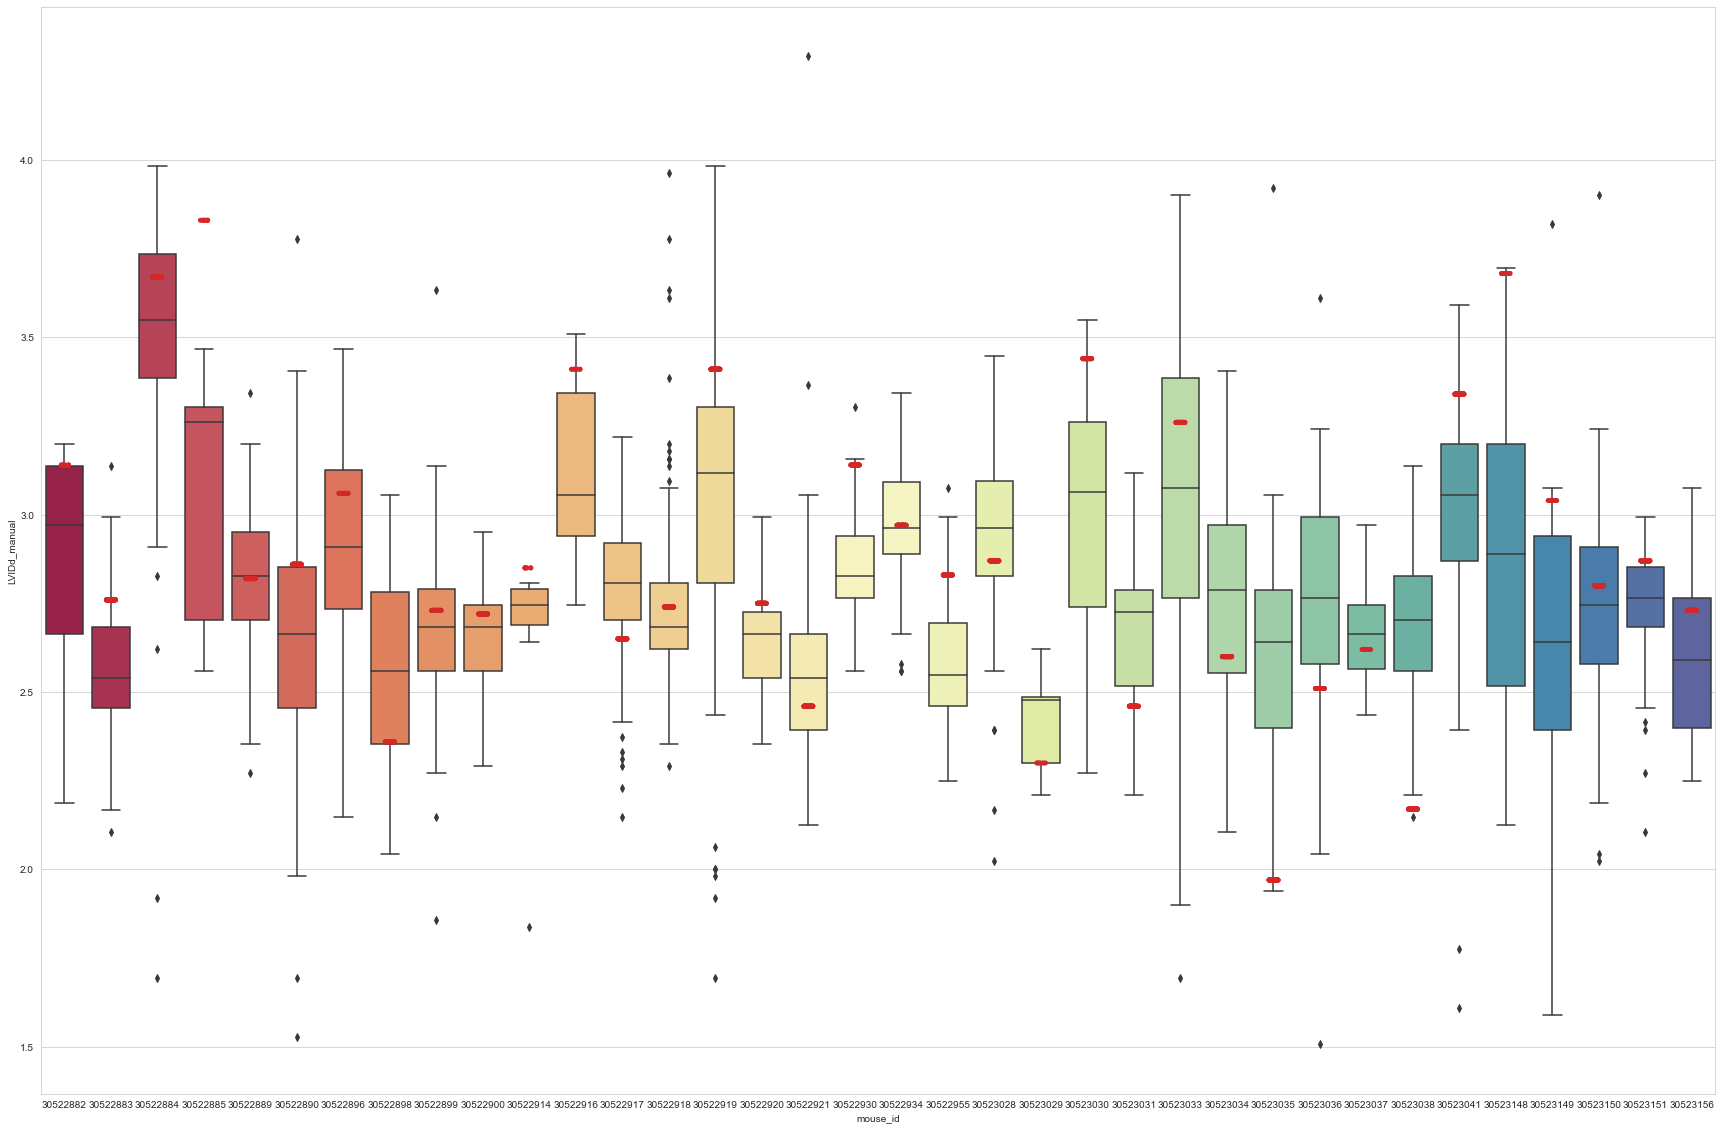

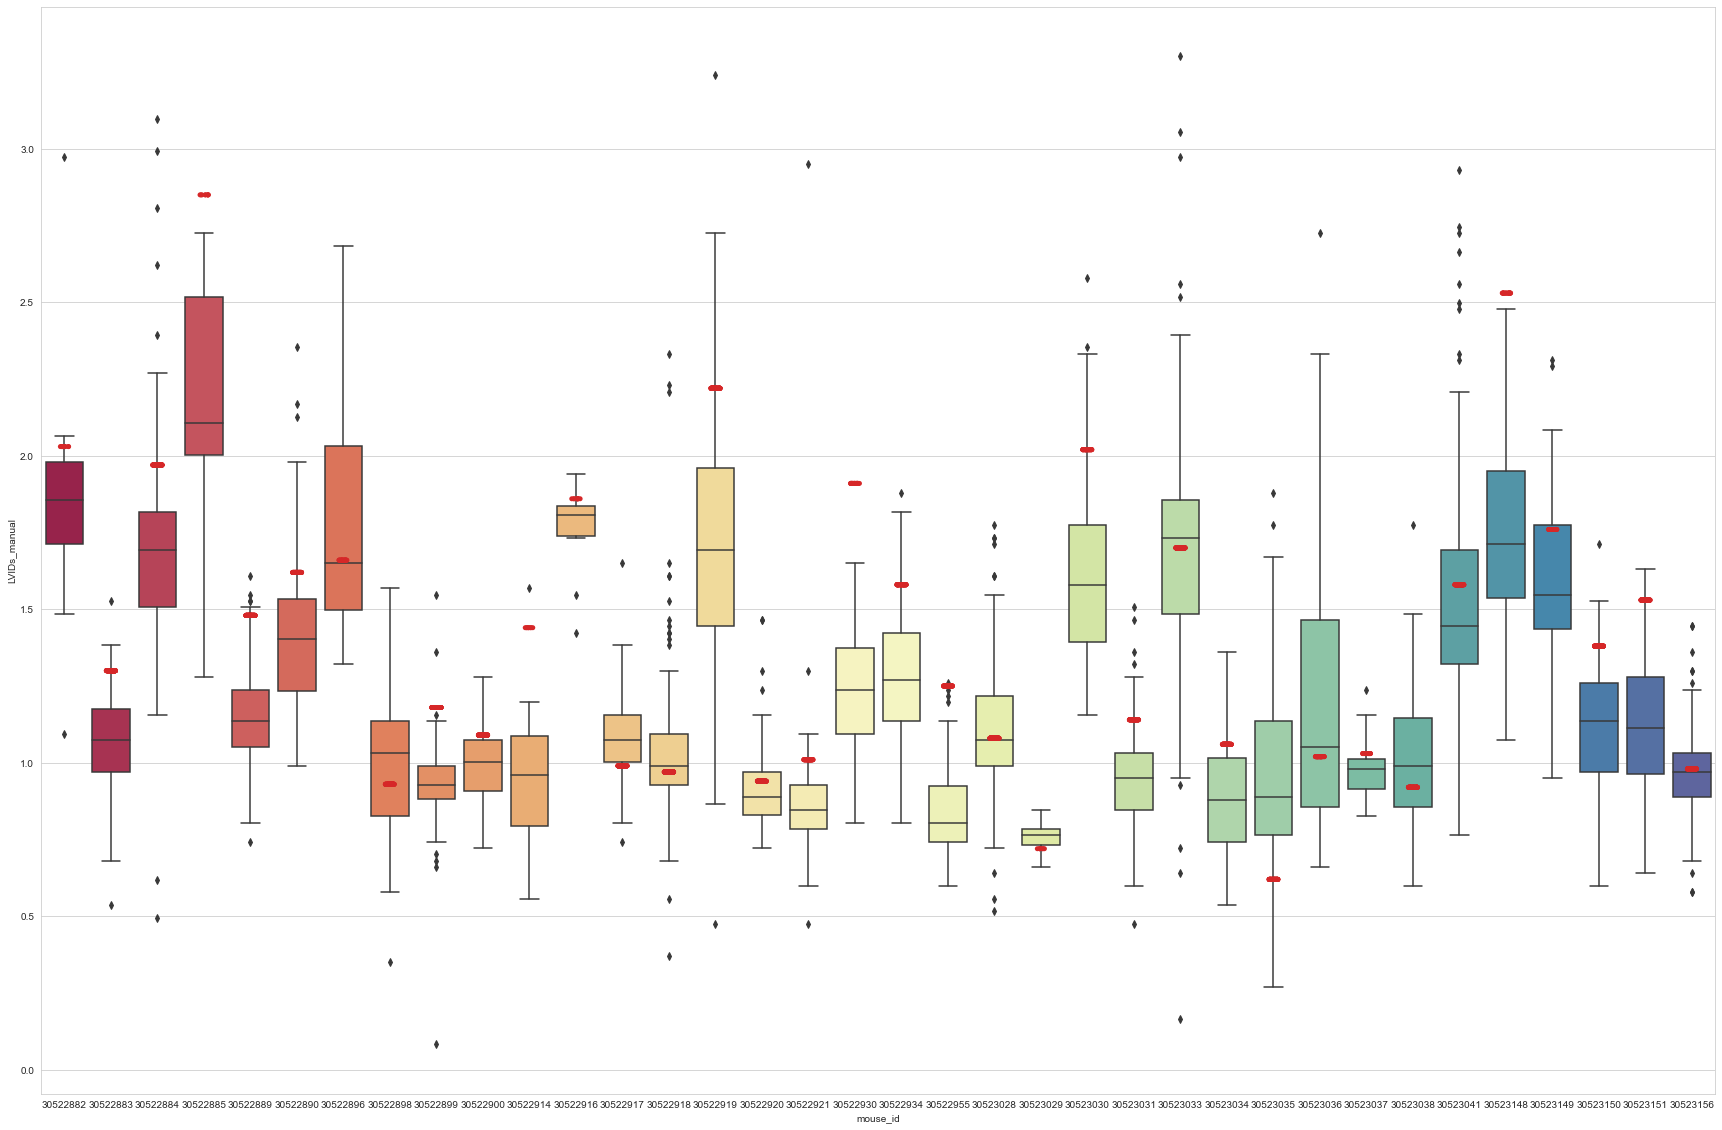

In [9]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

/var/folders/n_/jbljd4tj5n597j4x17mmm_240000gp/T/ipykernel_79824/1900006949.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize= (10,10))


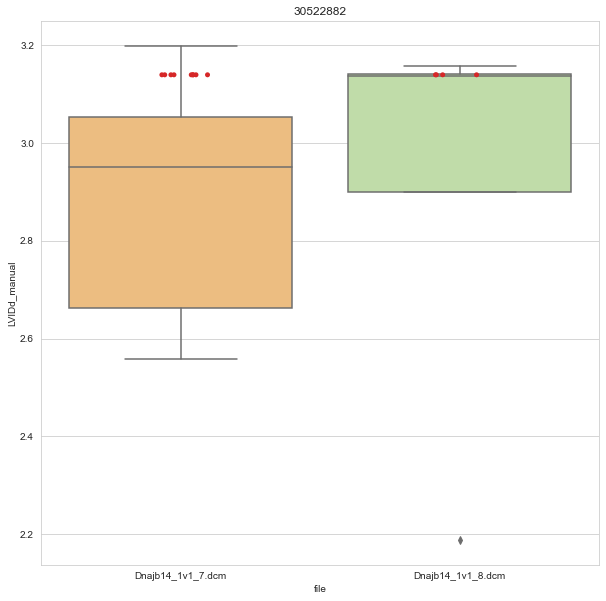

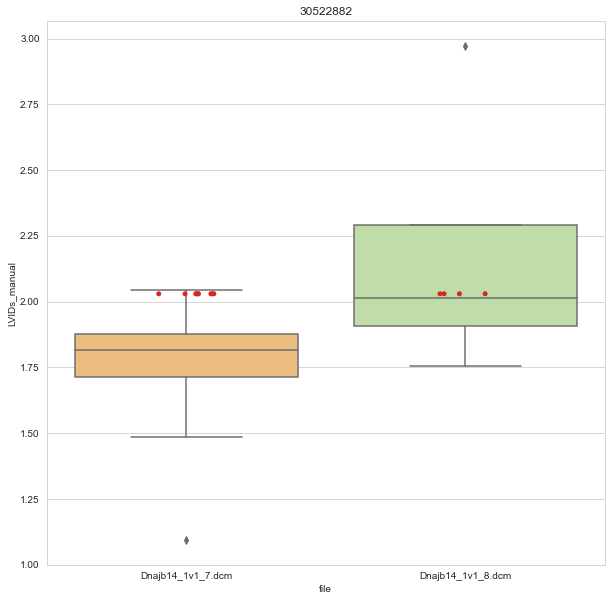

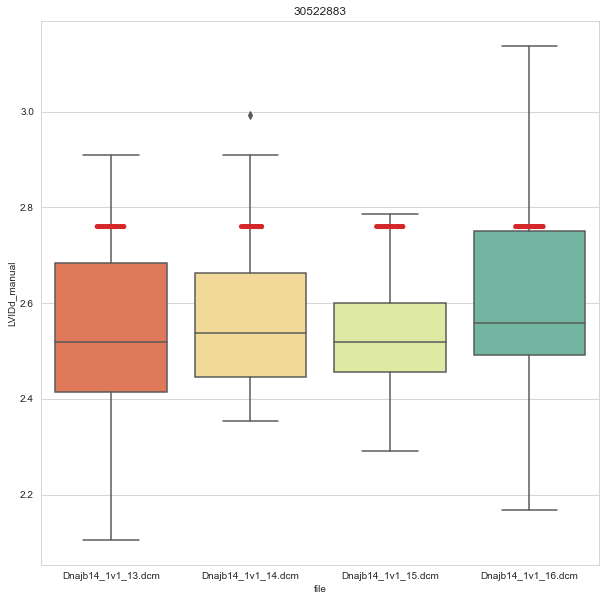

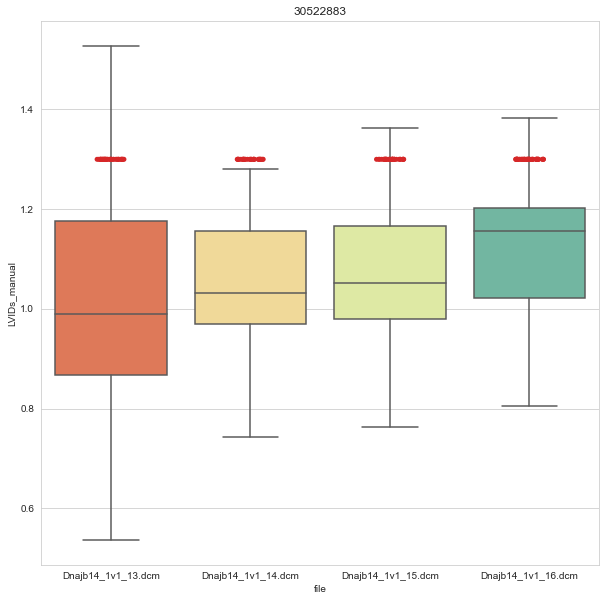

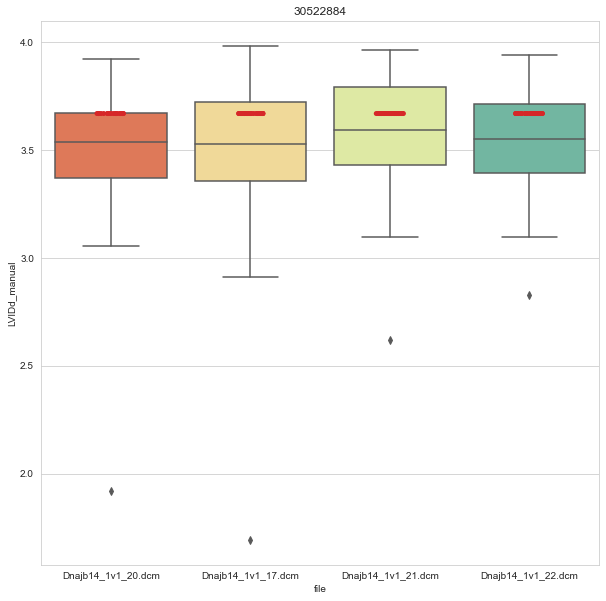

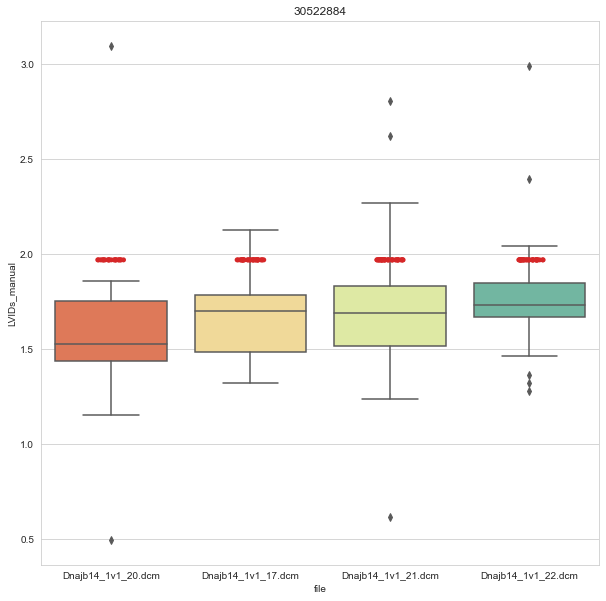

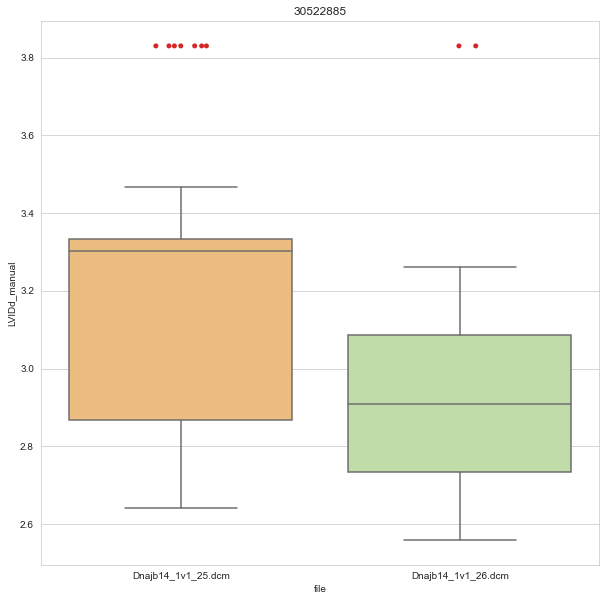

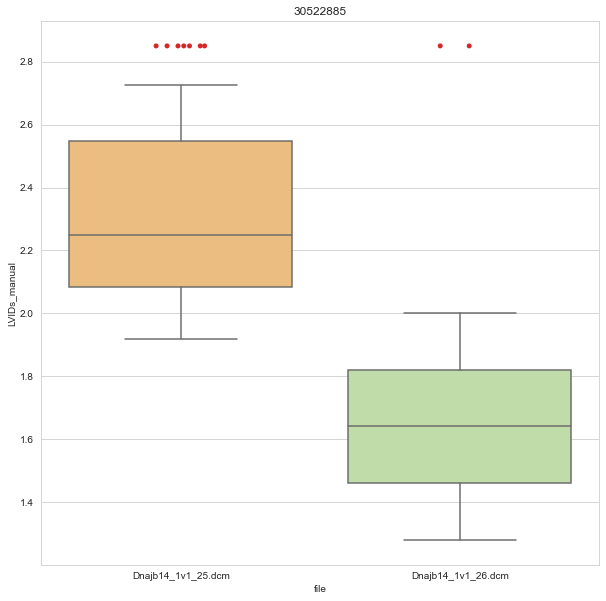

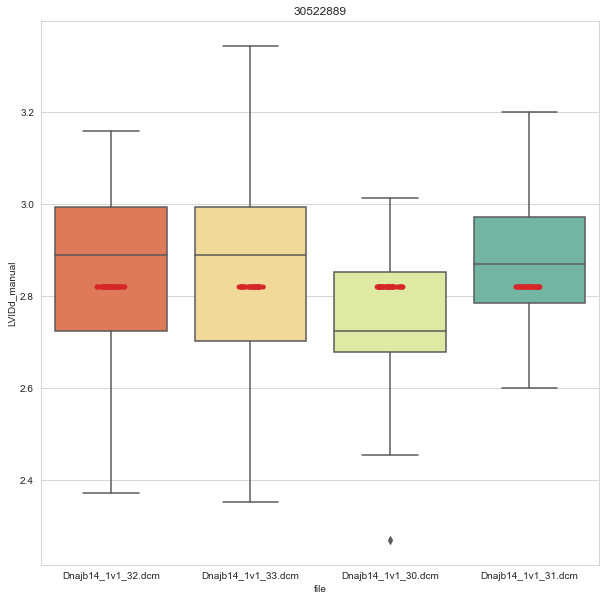

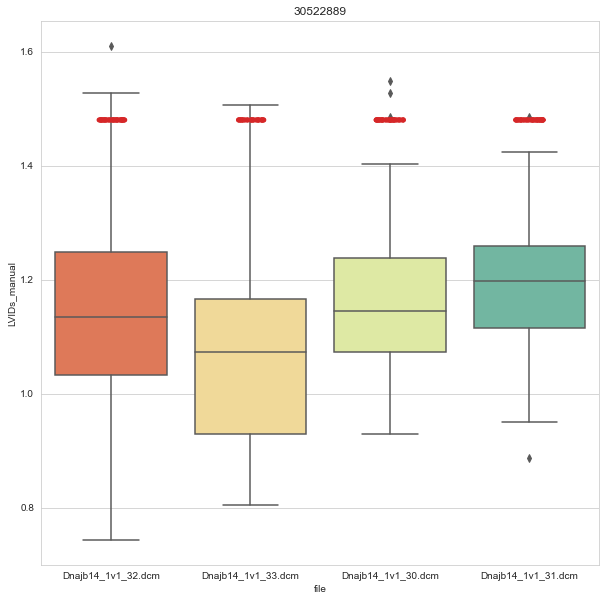

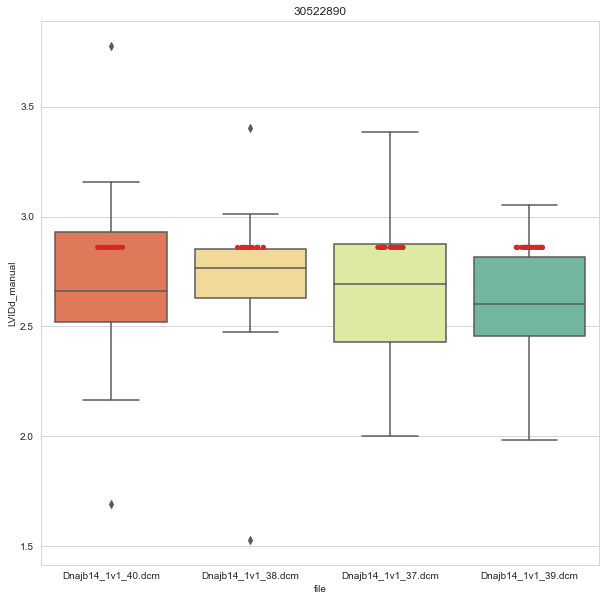

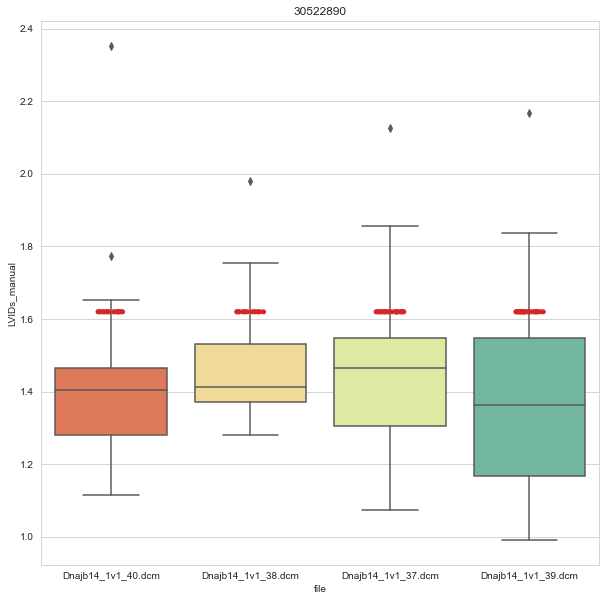

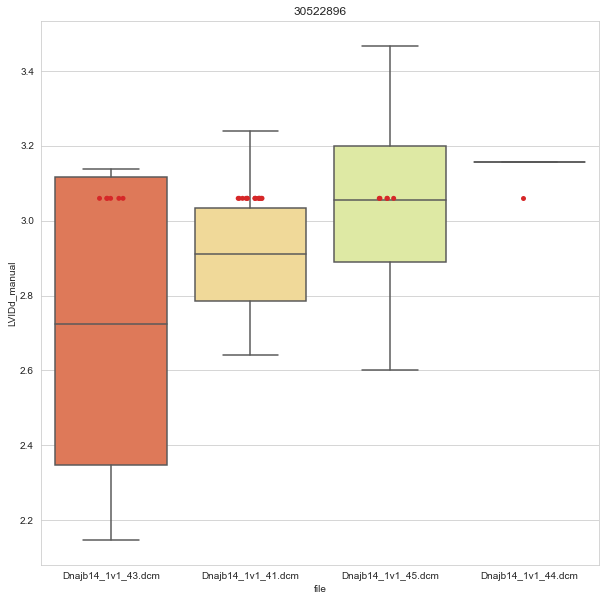

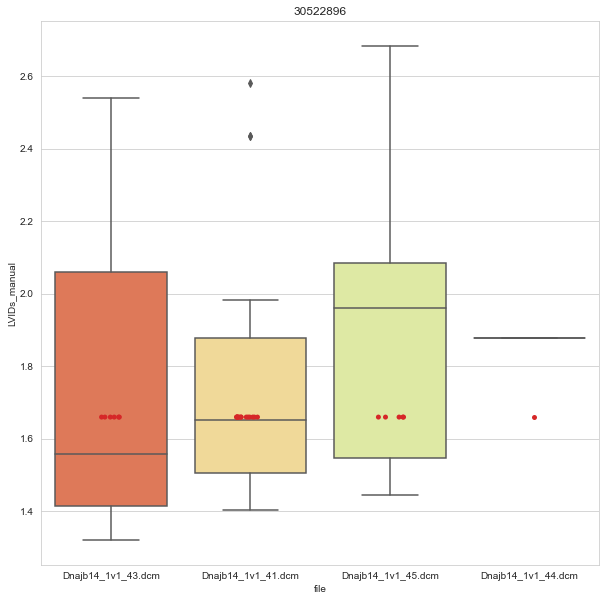

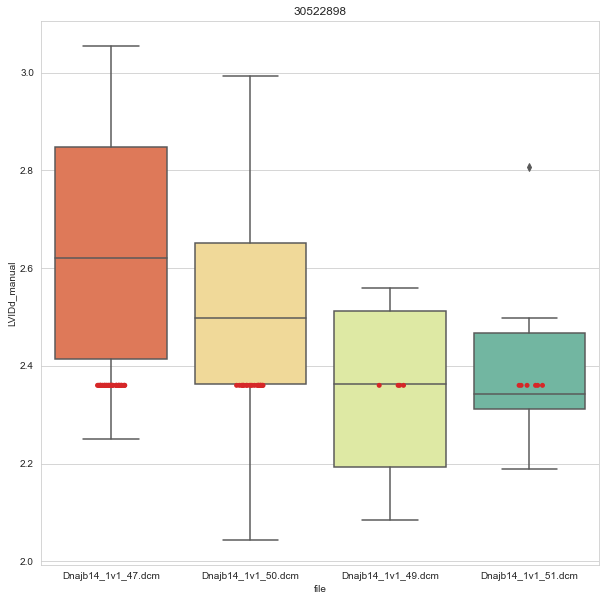

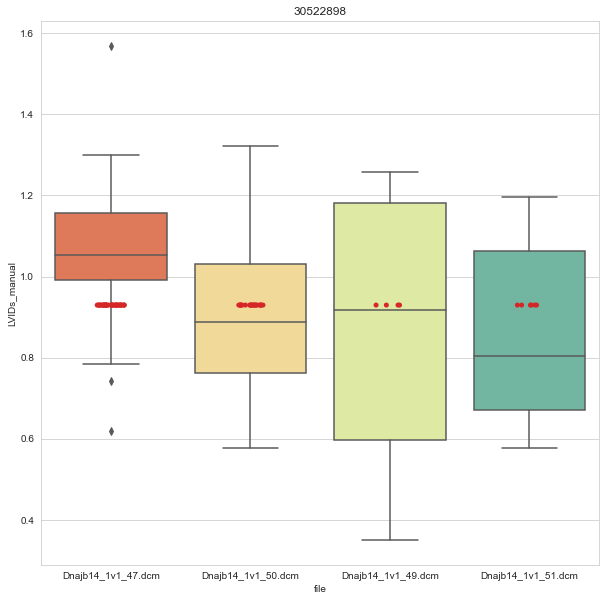

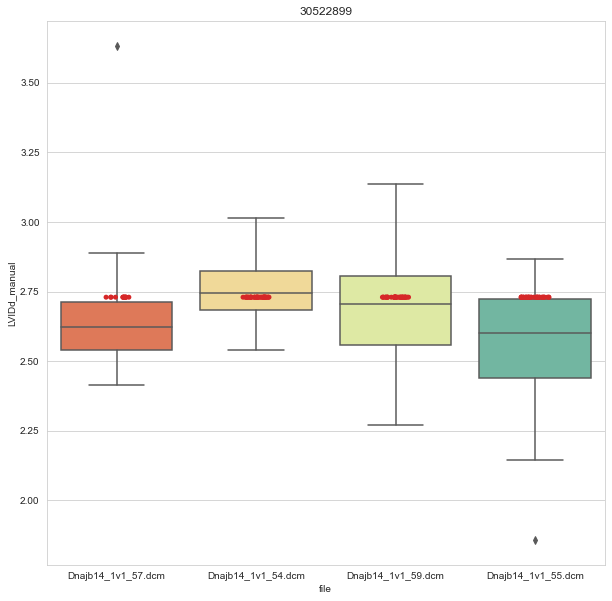

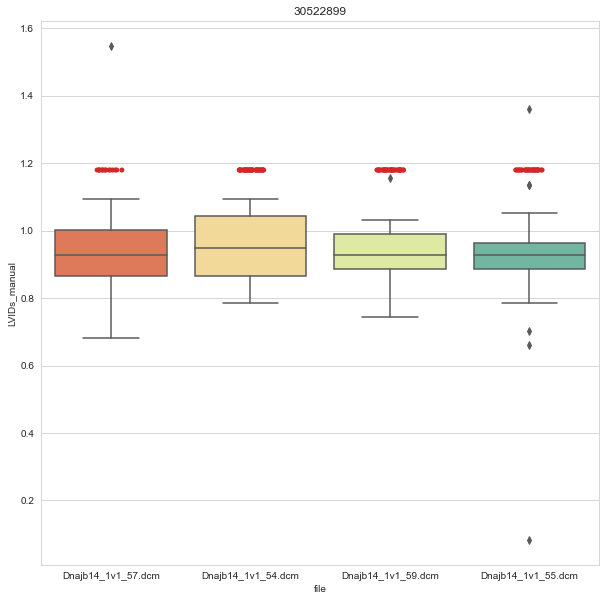

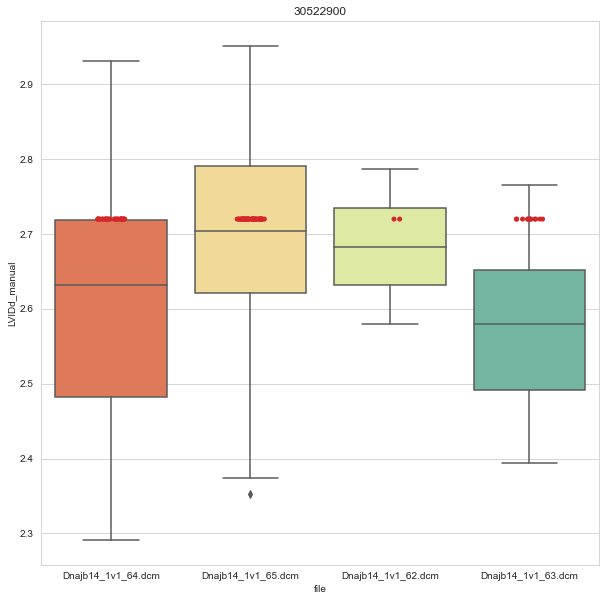

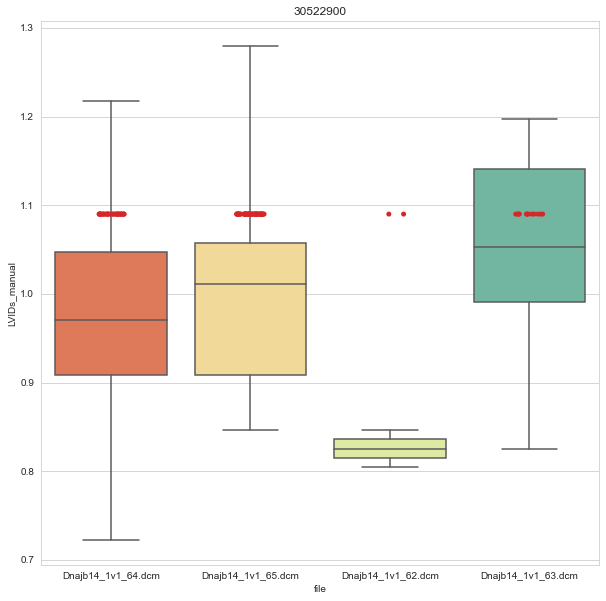

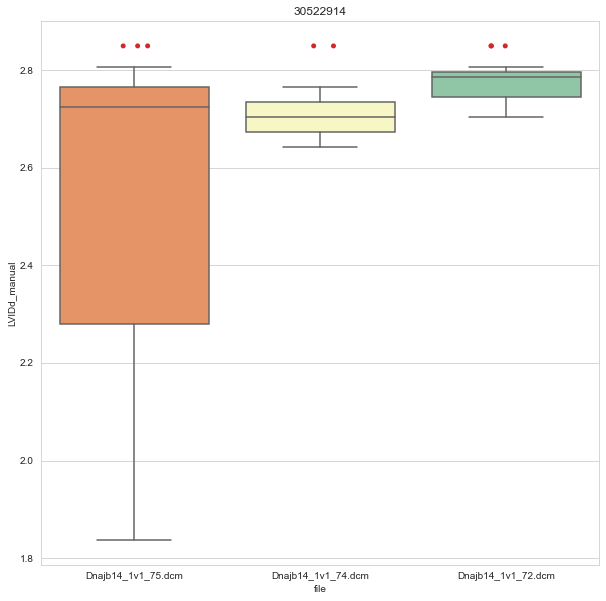

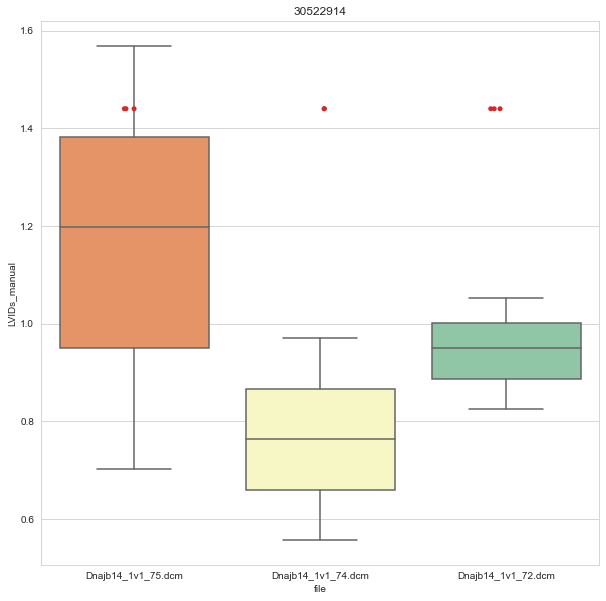

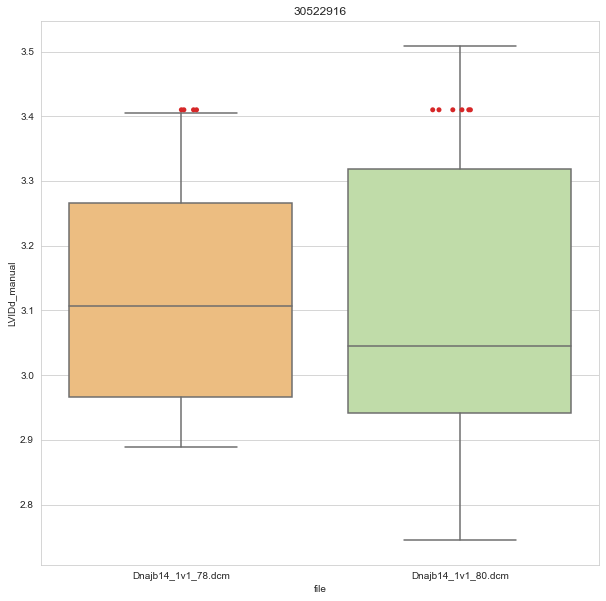

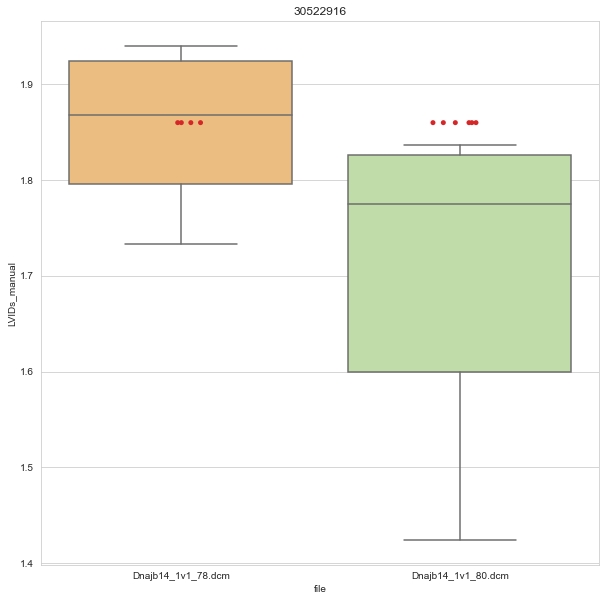

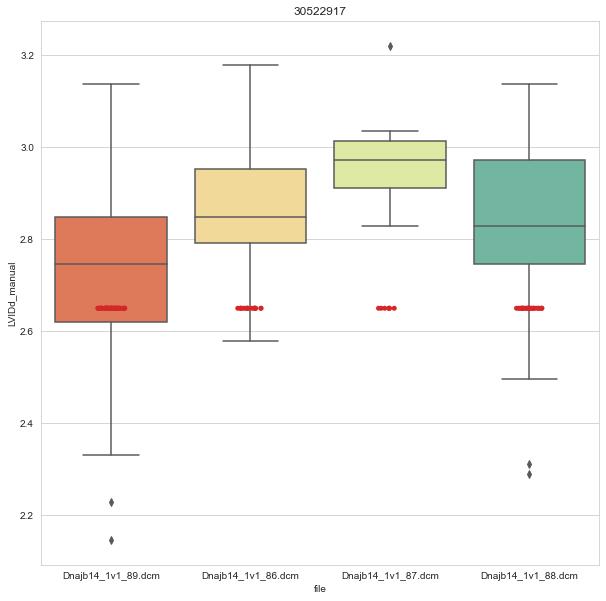

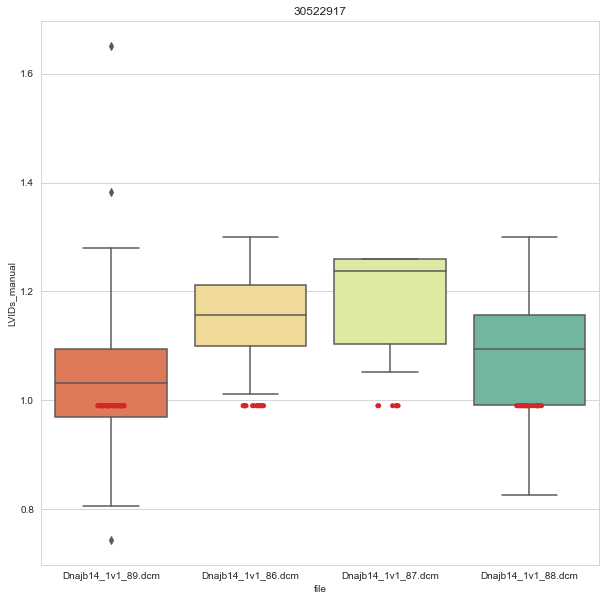

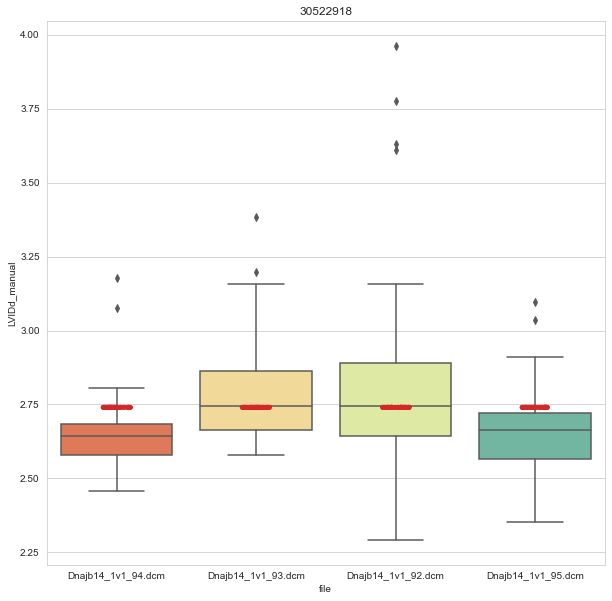

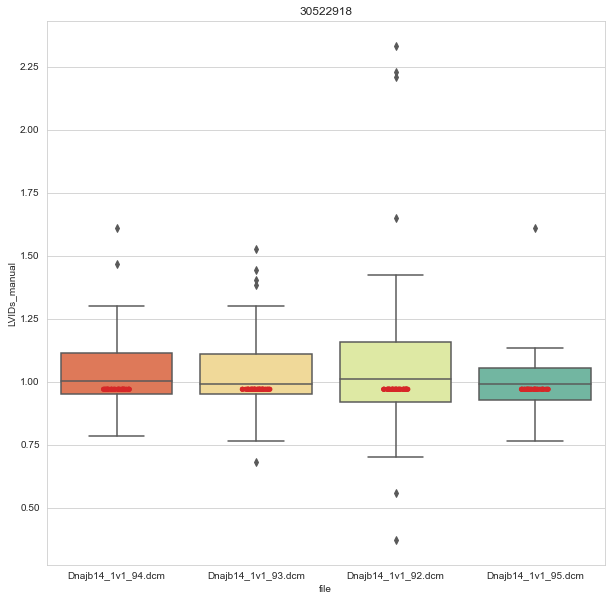

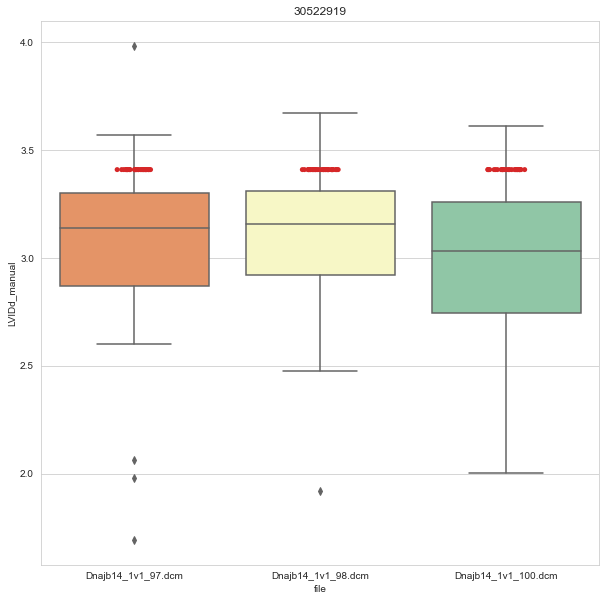

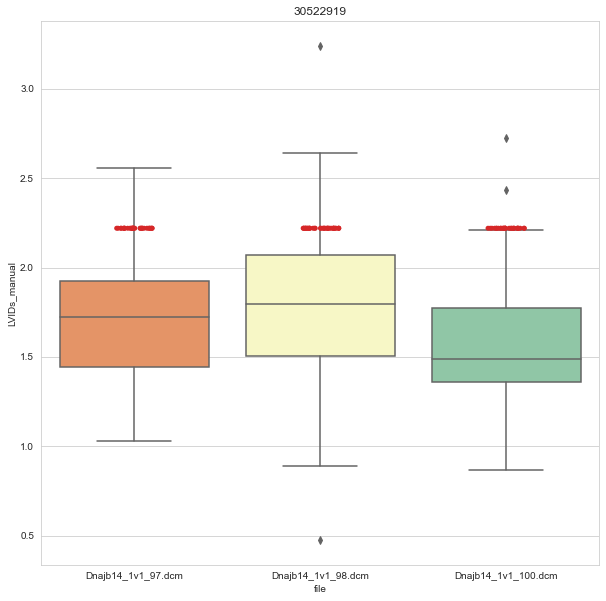

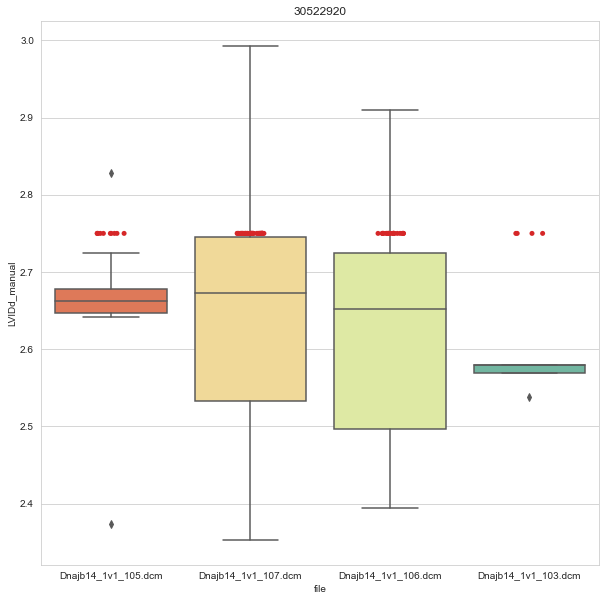

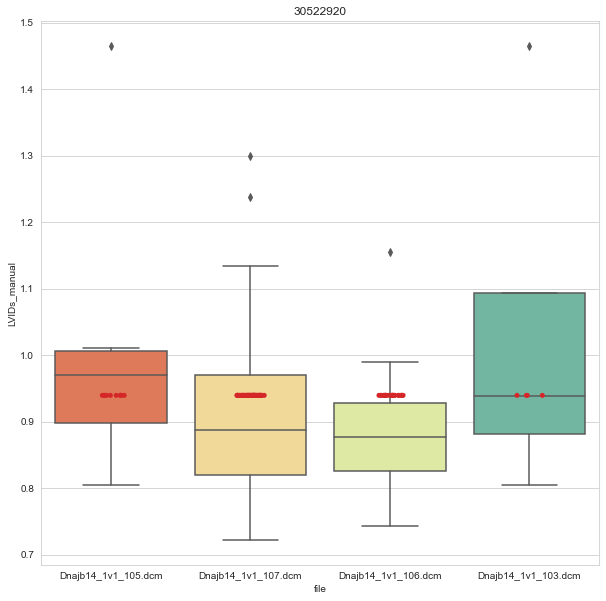

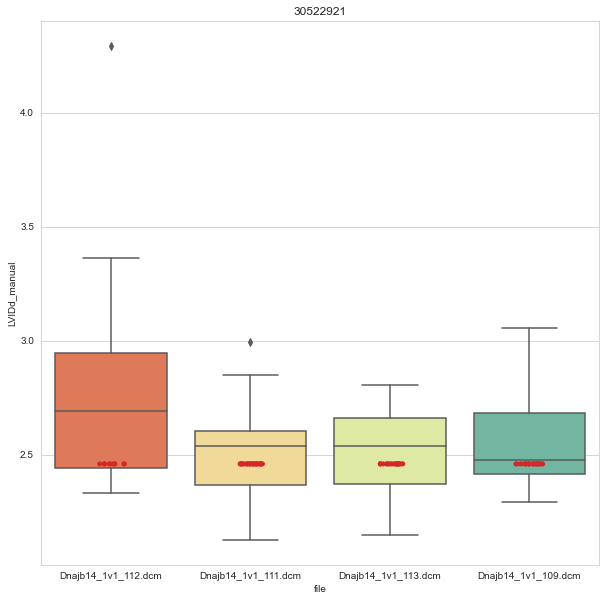

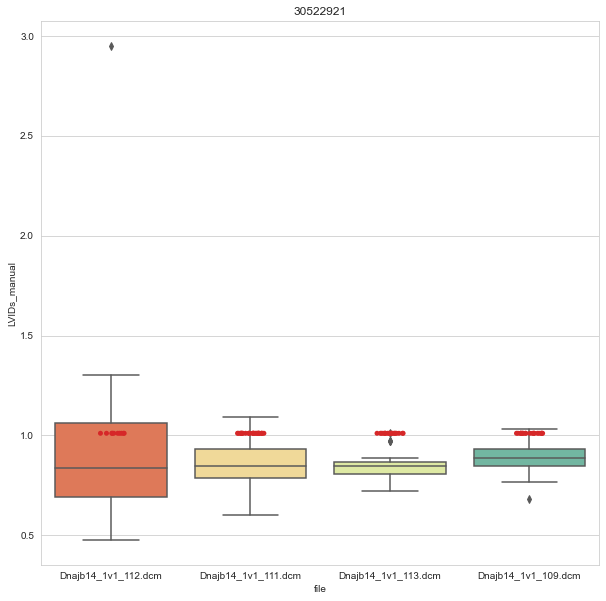

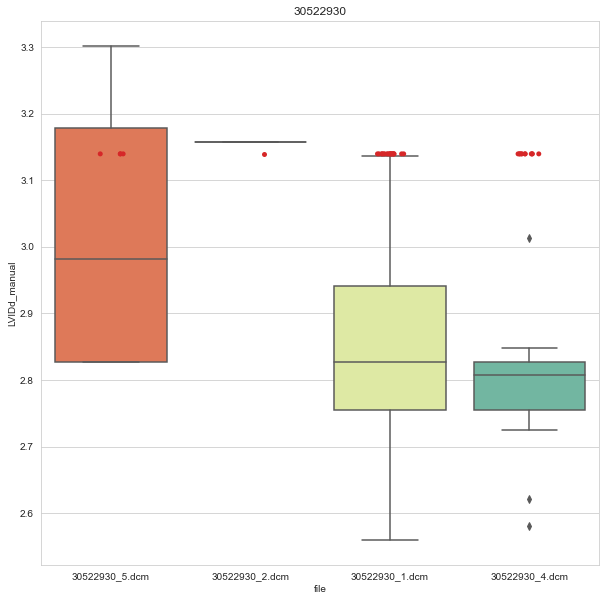

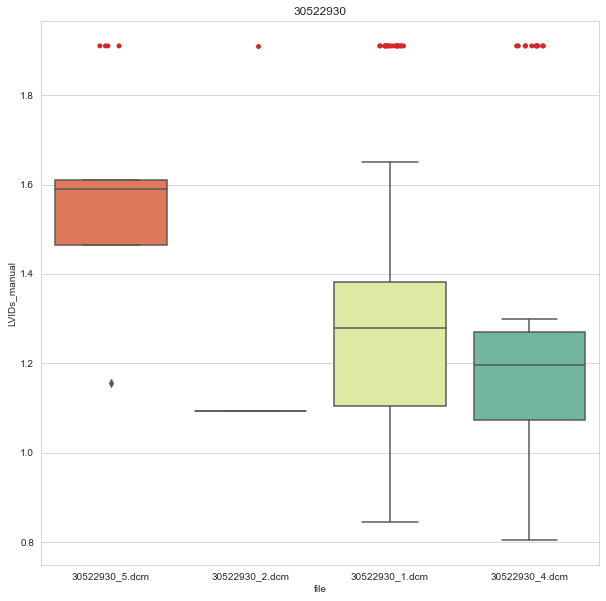

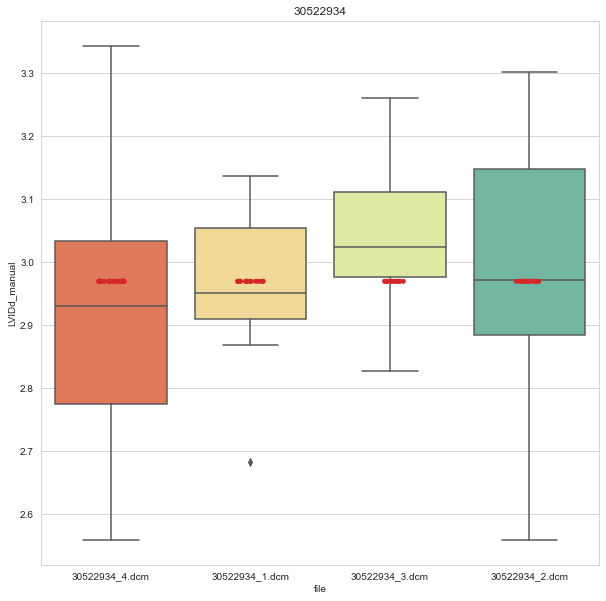

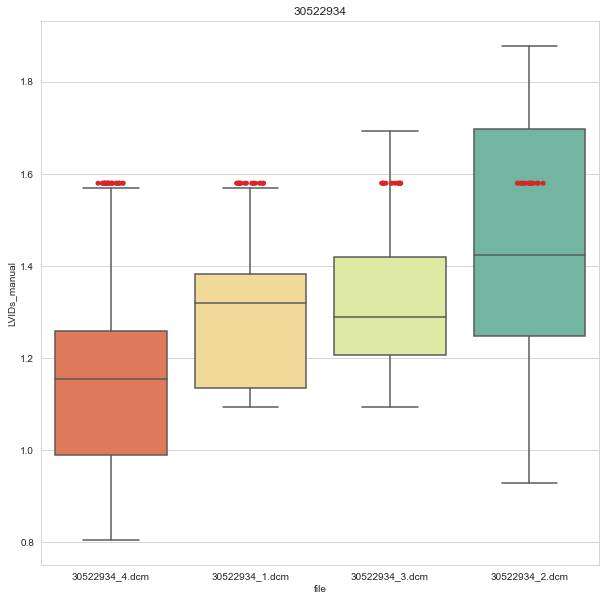

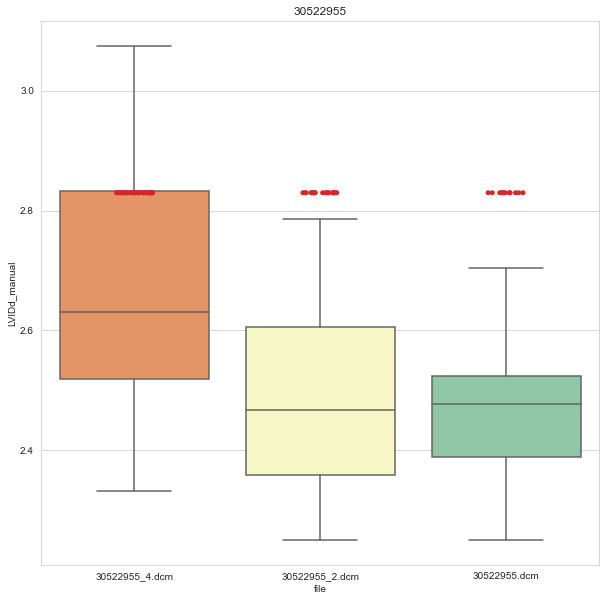

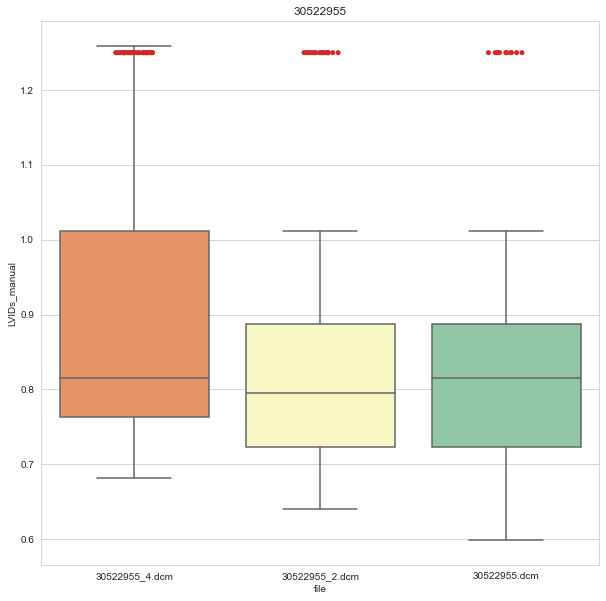

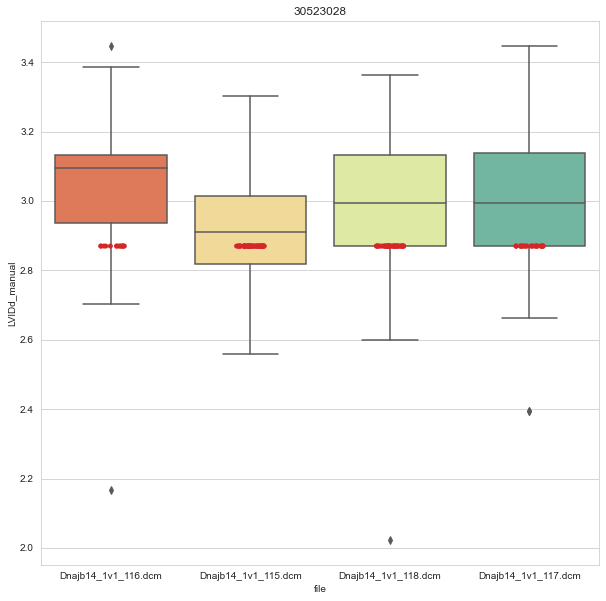

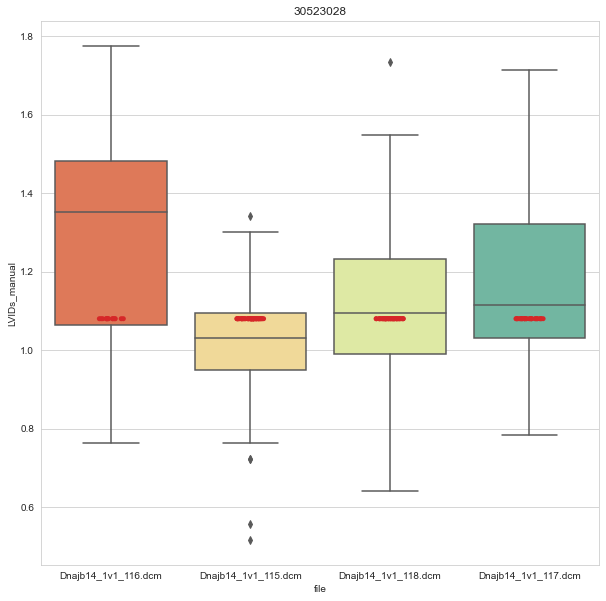

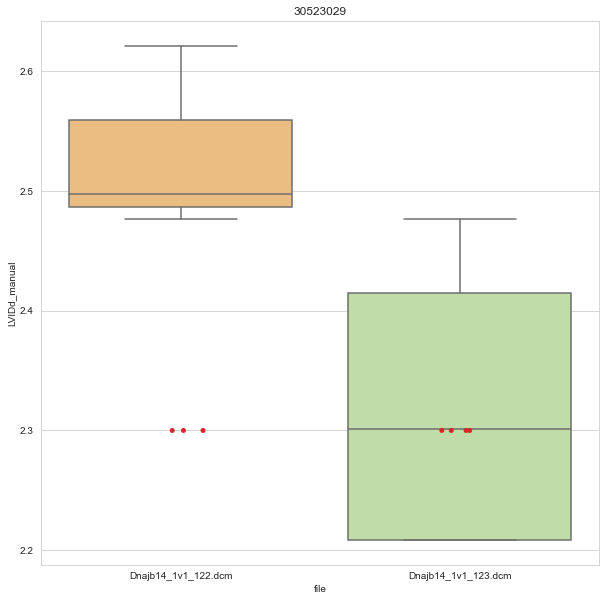

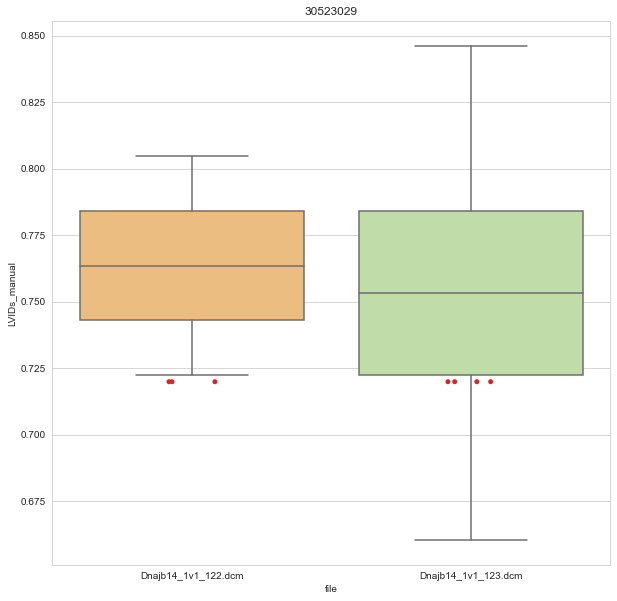

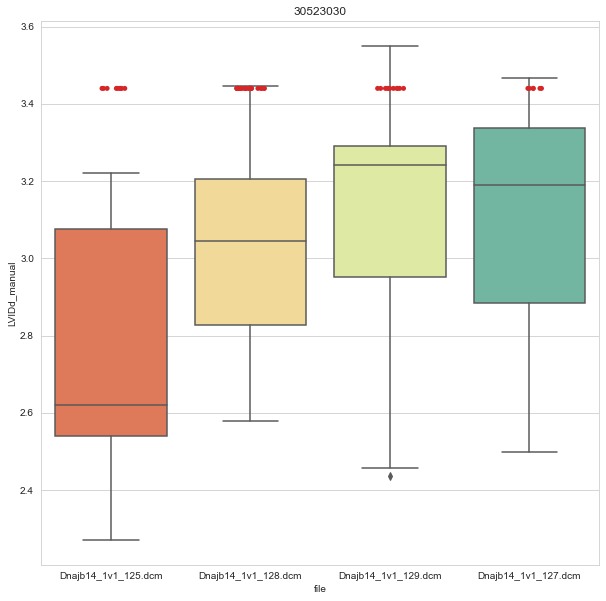

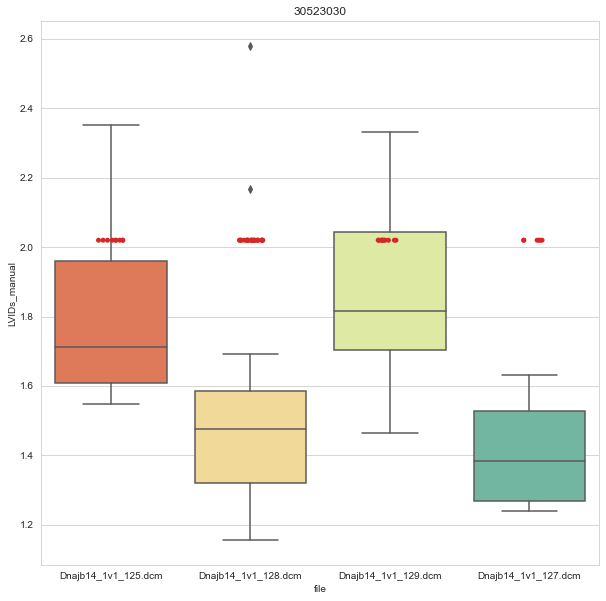

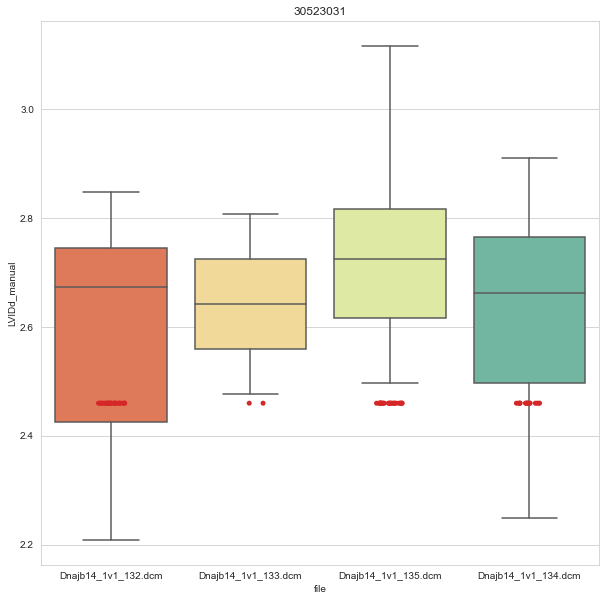

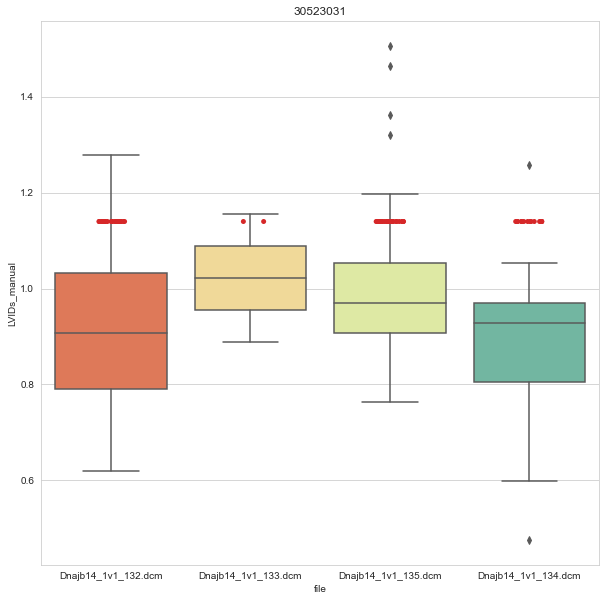

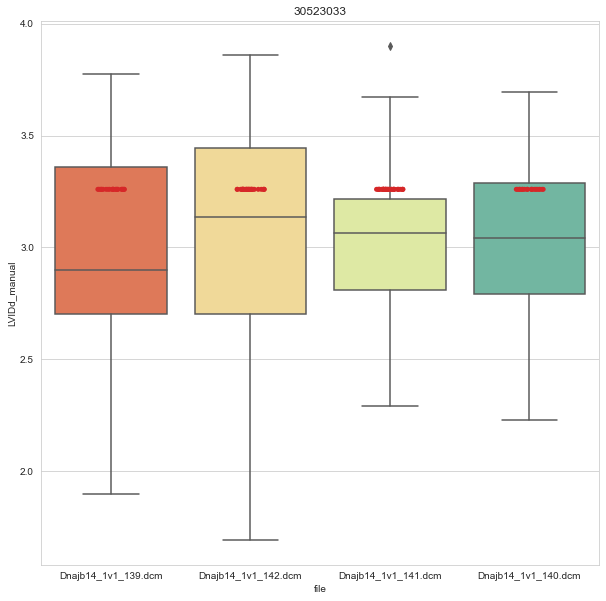

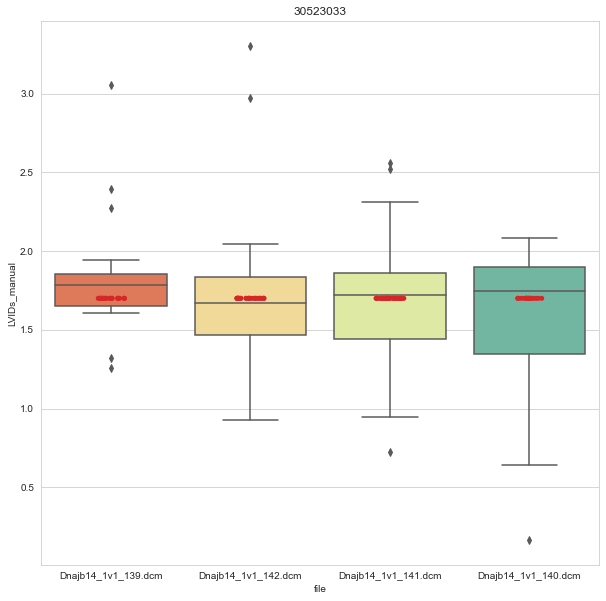

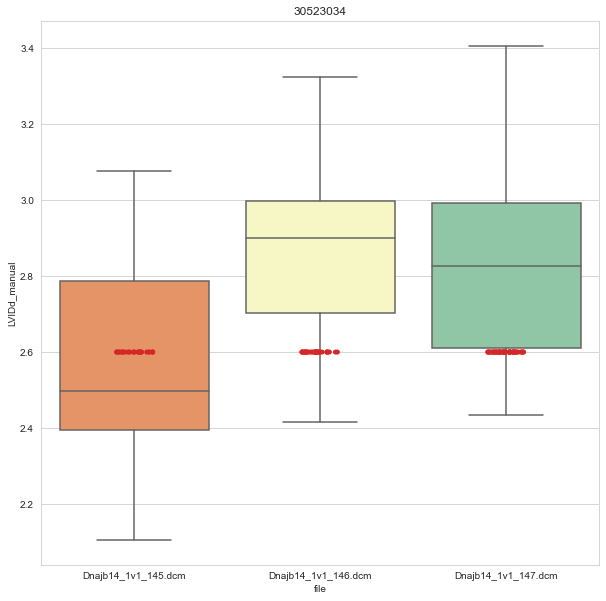

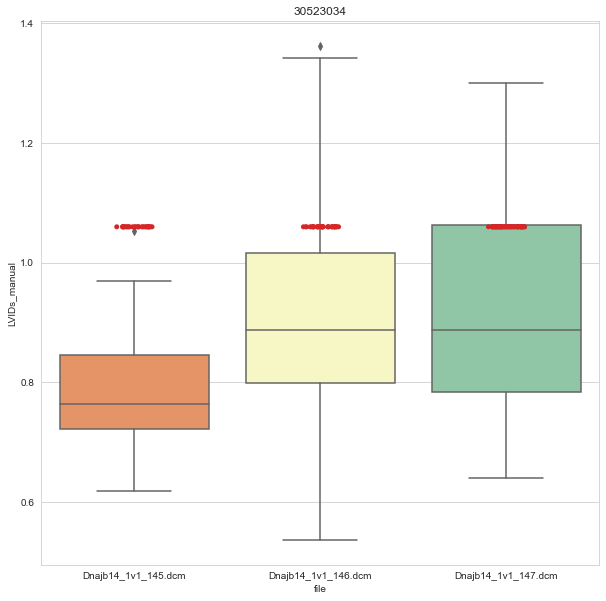

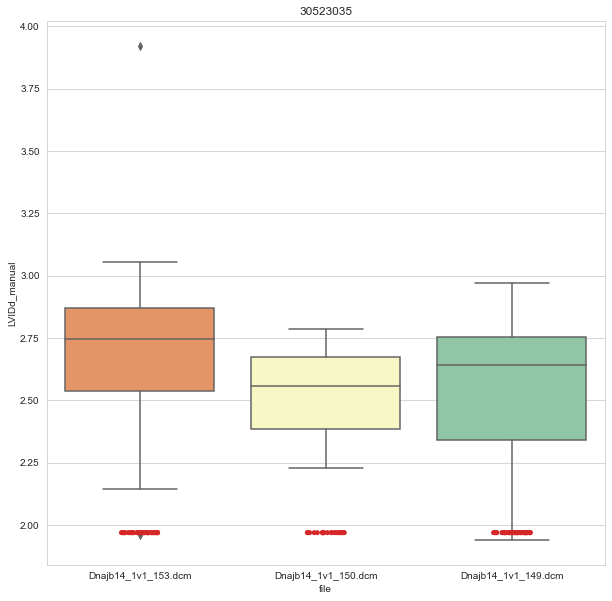

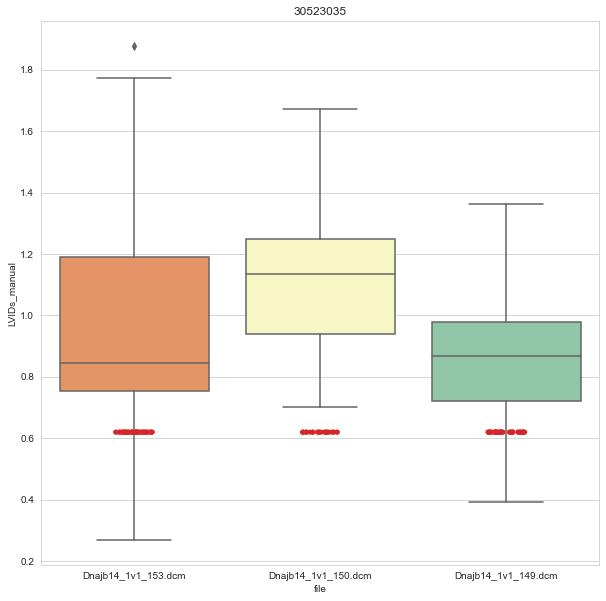

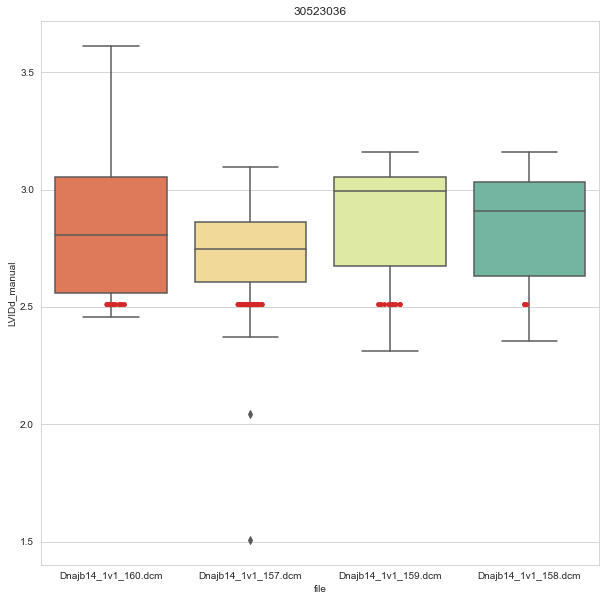

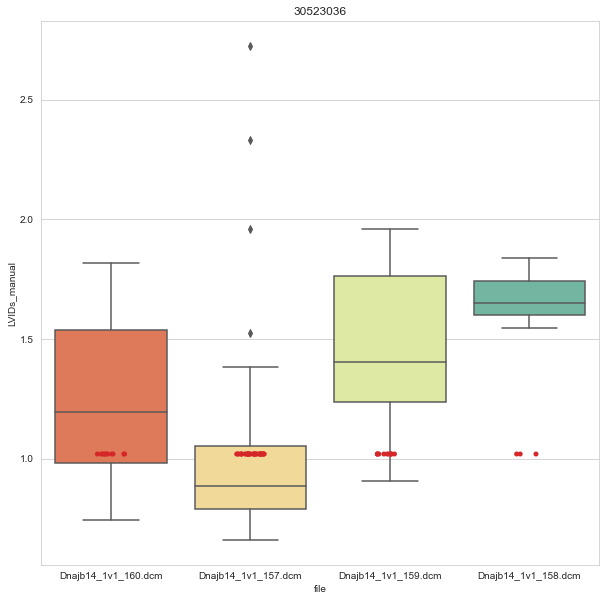

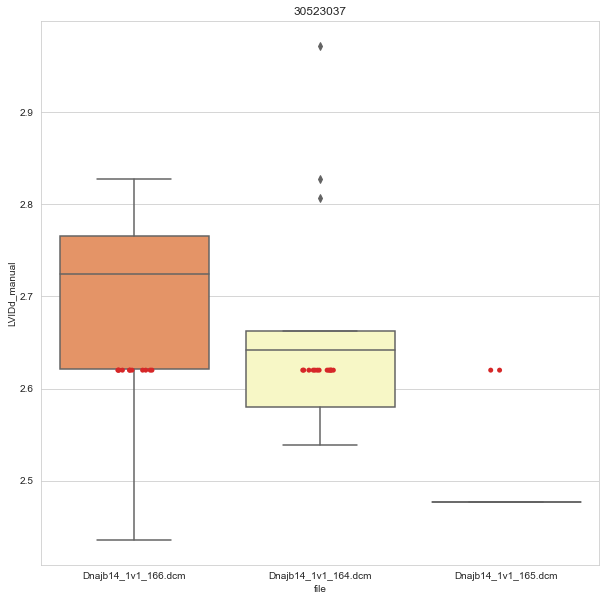

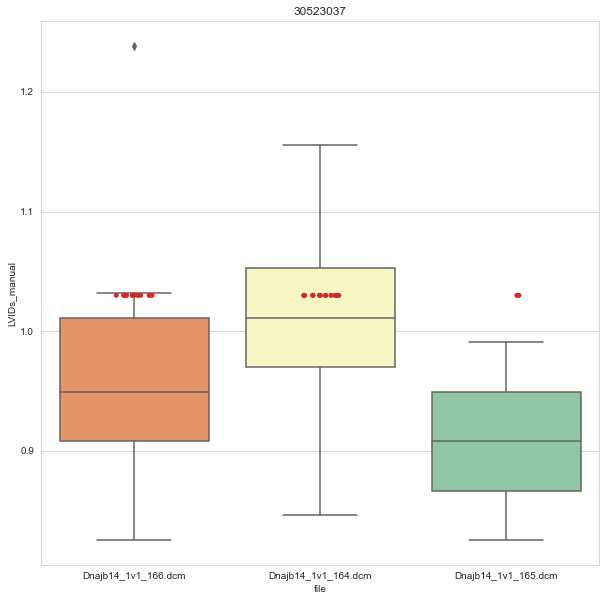

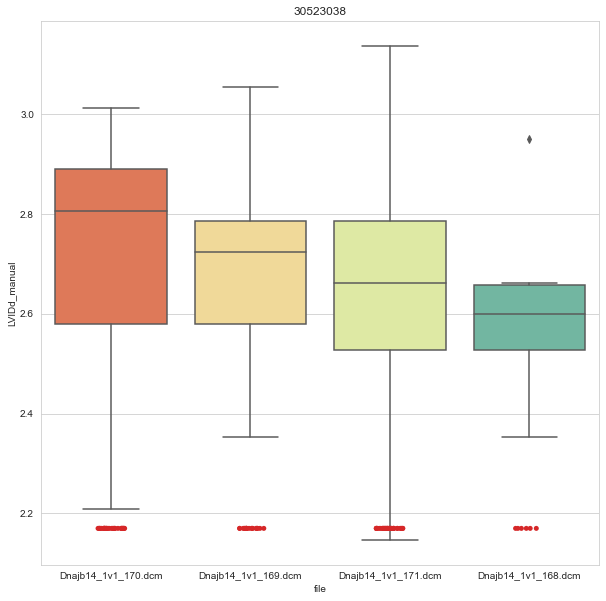

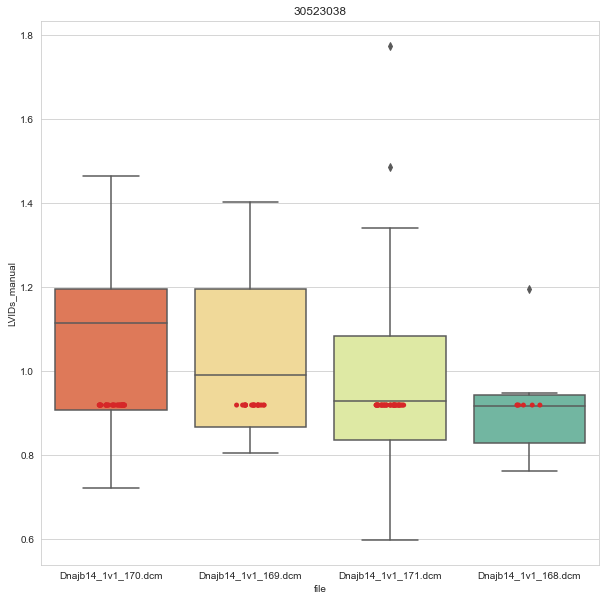

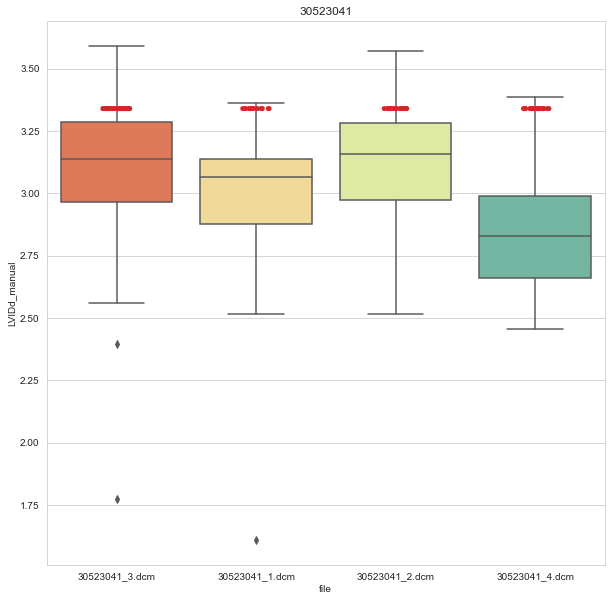

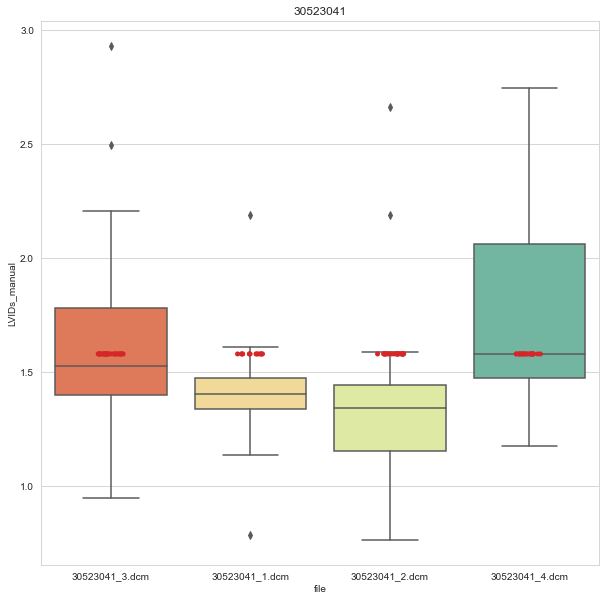

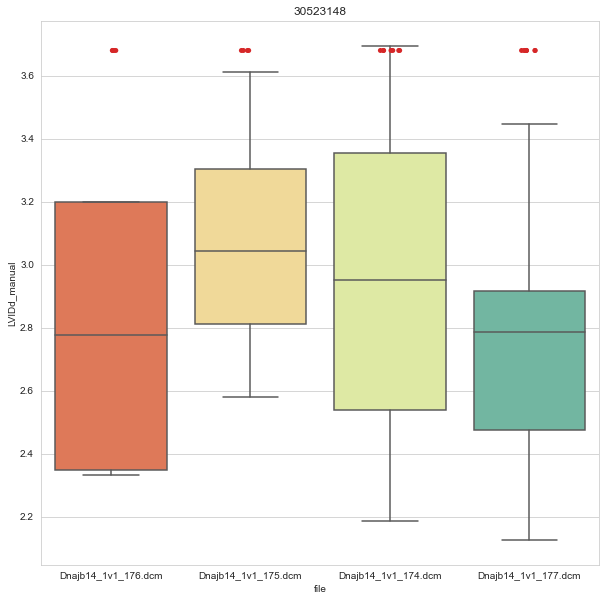

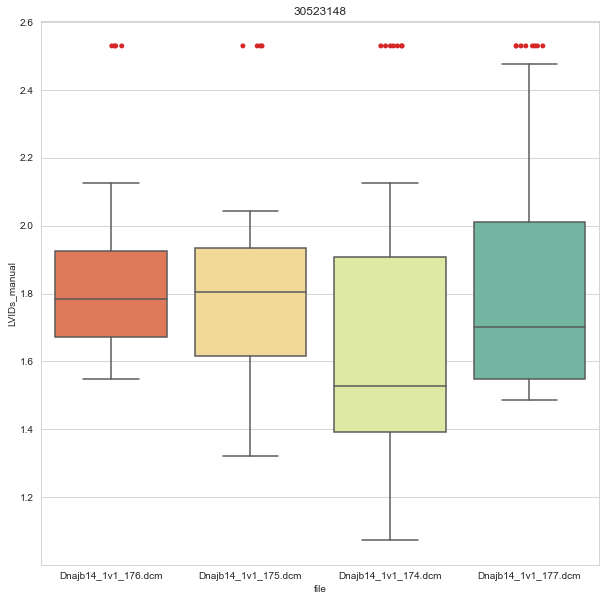

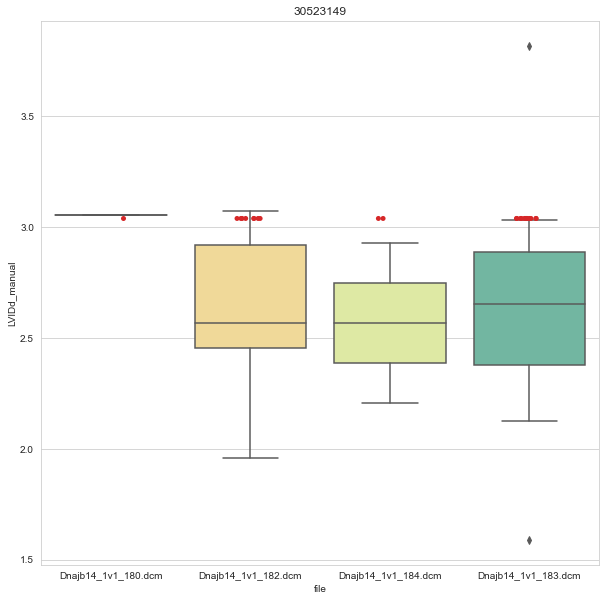

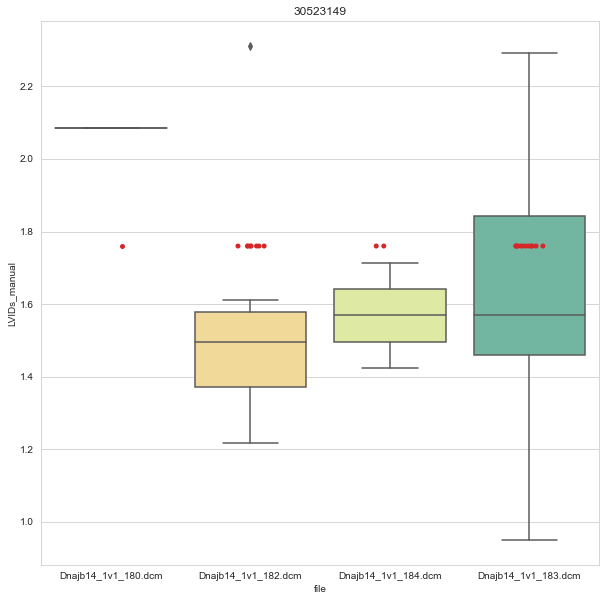

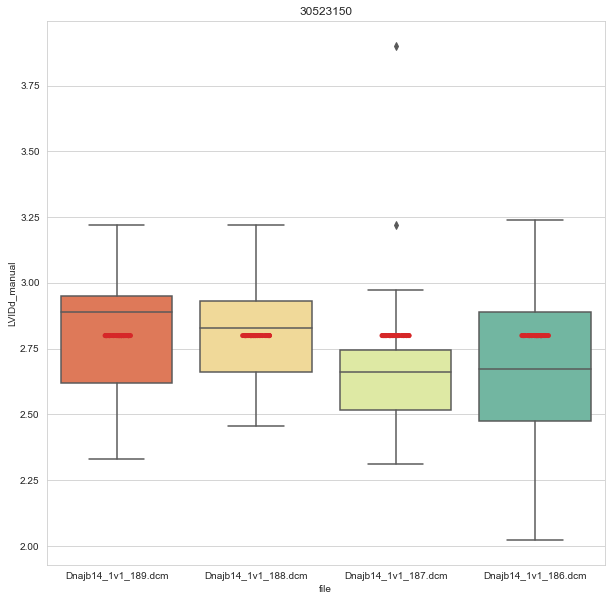

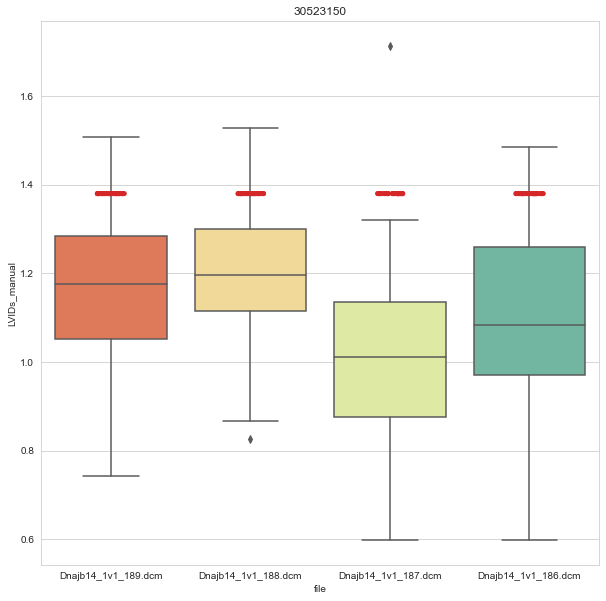

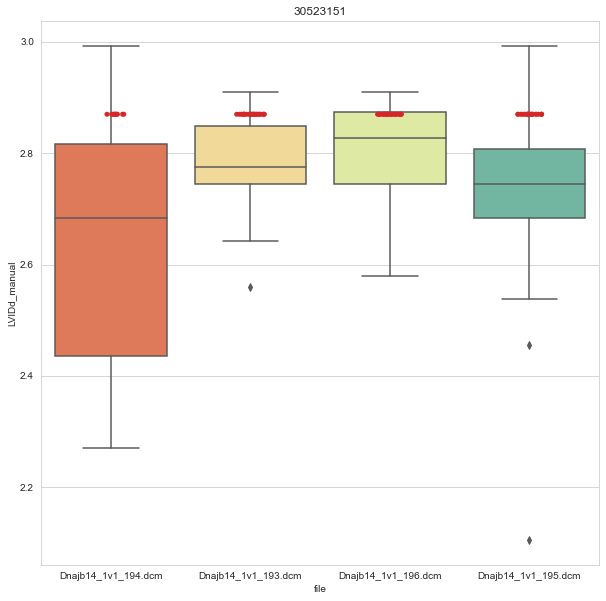

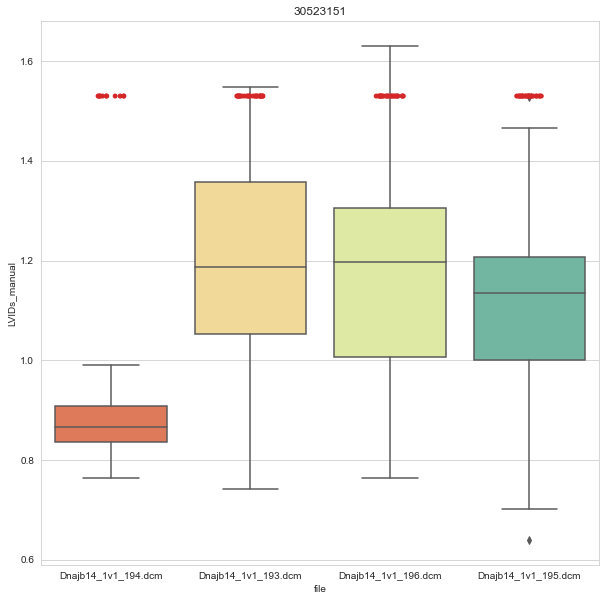

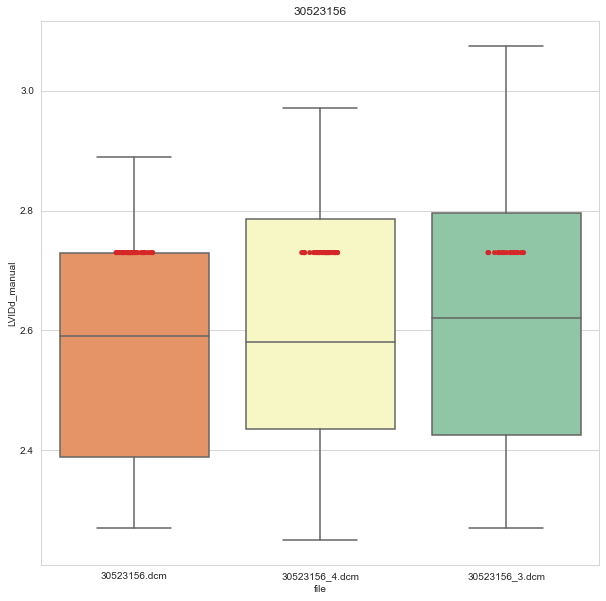

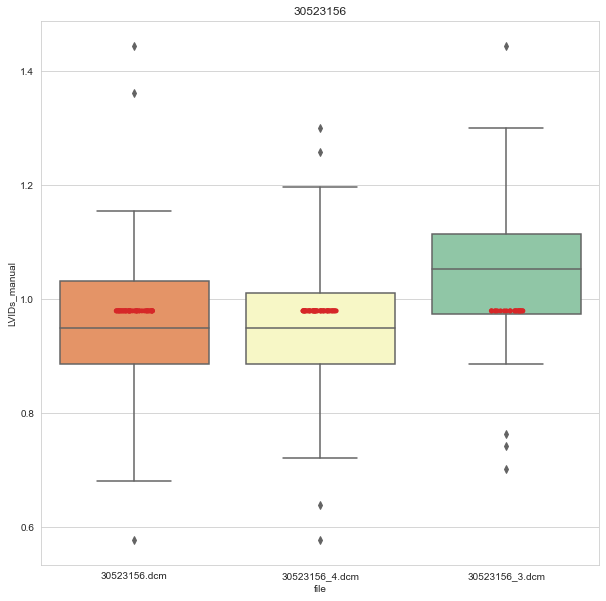

In [10]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [11]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
741,30522882,Dnajb14_1v1_8,15.878726,84.121274
742,30522882,Dnajb14_1v1_7,25.899281,74.100719
743,30522882,Dnajb14_1v1_9,0.000000,100.000000
744,30522882,Dnajb14_1v1_10,0.000000,100.000000
745,30522883,Dnajb14_1v1_13,73.535457,26.464543
...,...,...,...,...
1746,30523041,30523041_5,0.000000,100.000000
1747,30523156,30523156,84.121274,15.878726
1748,30523156,30523156_4,84.686536,15.313464
1749,30523156,30523156_3,41.778006,58.221994


### Image quality per mouse

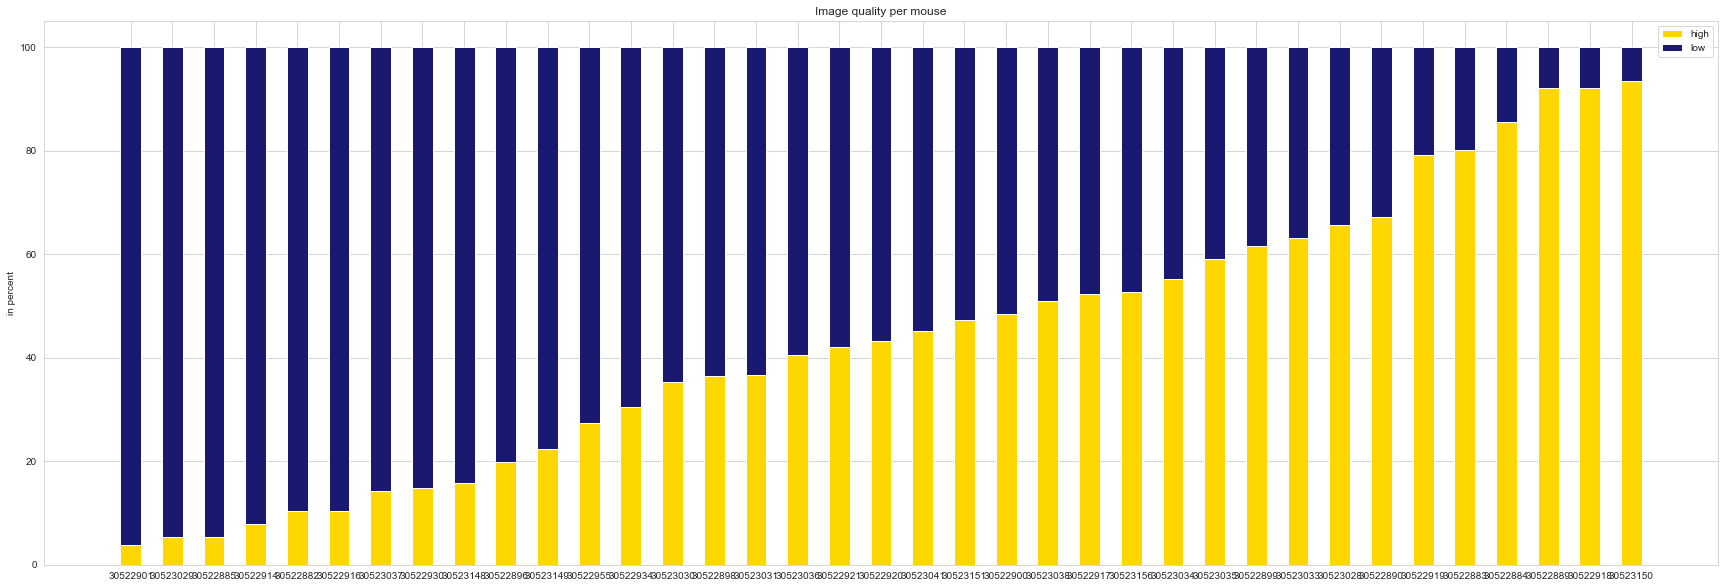

In [12]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(30,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

In [13]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Dnajb14,43.26,56.74


## Calculation of stats

In [14]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [15]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [16]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [17]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [18]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,3074.00,3074.00,3074.00,3074.00
mean,-0.03,-0.13,1.14,2.56
std,0.36,0.33,10.55,10.46
min,-1.98,-1.75,-76.96,-54.13
25%,-0.21,-0.32,-1.49,-2.41
50%,-0.04,-0.14,2.18,3.23
75%,0.15,0.03,5.97,8.81
max,1.95,1.94,35.60,47.71
number of mice,36.00,36.00,36.00,36.00


## Calculating p-values with manually annotated data

In [19]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [20]:
# LVIDs systole
_, f_man_LVIDs = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDs_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDs = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDs_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDs = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDs_manual'], manual[manual['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)

# LVIDs diastole
_, f_man_LVIDd = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDd_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDd = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDd_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDd = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDd_manual'], manual[manual['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)

# Ejection fraction
_, f_man_ef = mannwhitneyu(f_man[f_man['genotype'] == 'control']['EF_manual'], f_man[f_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, m_man_ef = mannwhitneyu(m_man[m_man['genotype'] == 'control']['EF_manual'], m_man[m_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, man_ef = mannwhitneyu(manual[manual['genotype'] == 'control']['EF_manual'], manual[manual['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)

#Fractional shortening
_, f_man_fs= mannwhitneyu(f_man[f_man['genotype'] == 'control']['FS_manual'], f_man[f_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, m_man_fs= mannwhitneyu(m_man[m_man['genotype'] == 'control']['FS_manual'], m_man[m_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, man_fs= mannwhitneyu(manual[manual['genotype'] == 'control']['FS_manual'], manual[manual['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)

## Calculating p-values with automatically annotated data

### Creation of subgroups

In [21]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

### Wilcoxn-Rank-Sum-Test

In [22]:
# LVIDs systole
_, p_f_auto_LVIDs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDs_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDs_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDs_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)

In [23]:
# LVIDs diastole
_, p_f_auto_LVIDd = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDd_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDd = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDd_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDd = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDd_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)

In [24]:
# Ejection fraction
_, p_f_auto_ef = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['EF_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_ef = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['EF_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_ef = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['EF_auto'], means_auto[means_auto['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)

In [25]:
# Fractional shortening
_, p_f_auto_fs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['FS_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_fs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['FS_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_fs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['FS_auto'], means_auto[means_auto['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)

In [26]:
p_values = pd.DataFrame([[f_man_LVIDs, p_f_auto_LVIDs, m_man_LVIDs, p_m_auto_LVIDs ],
                         [f_man_LVIDd, p_f_auto_LVIDd, m_man_LVIDd, p_m_auto_LVIDd ],
                         [f_man_ef   , p_f_auto_ef   , m_man_ef   , p_m_auto_ef    ],
                         [f_man_fs   , p_f_auto_fs   , m_man_fs   , p_m_auto_fs    ]],
                        index = ['LVIDs', 'LVIDd', 'ejection fraction', 'fractional shortening'],
                        columns = ['f manual', 'f automatic', 'm manual', 'm automatic'])

In [27]:
p_values.round(3)

,f manual,f automatic,m manual,m automatic
LVIDs,0.967,0.633,1.000,0.659
LVIDd,0.775,0.360,0.691,0.724
ejection fraction,0.838,0.696,1.000,0.659
fractional shortening,0.775,0.829,1.000,0.724


In [28]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control']),
      len(f_man[f_man['genotype'] == 'mutant']),
      len(means_auto_f[means_auto_f['genotype'] == 'mutant'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control']),
      len(m_man[m_man['genotype'] == 'mutant']),
      len(means_auto_m[means_auto_m['genotype'] == 'mutant'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con', 'man mut', 'auto mut']
)
num_stats

,man con,auto con,man mut,auto mut
f,9,8,10,10
m,9,9,9,9


In [29]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')
p_values.to_csv(gene + '_p_values.csv')

In [30]:
def color_p_values(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'coral' if val < 0.05 else ''
    return 'background-color: %s' % color

In [31]:
analysis_overview = p_values.style.applymap(color_p_values).format("{:1.3f}")
analysis_overview

,f manual,f automatic,m manual,m automatic
LVIDs,0.967,0.633,1.000,0.659
LVIDd,0.775,0.360,0.691,0.724
ejection fraction,0.838,0.696,1.000,0.659
fractional shortening,0.775,0.829,1.000,0.724
